In [1]:
import pandas as pd
import os
import numpy as np

In [5]:
labels_dir = '/cnl/abcd/data/labels/' 
os.chdir(labels_dir)
# labels=pd.read_csv('baseline_depr.csv',header=None, index_col=0)
labels=pd.read_csv('baseline_depr_sex_age_hand.csv', index_col=0)


In [6]:
labels

,sex,age,hand,depress_dsm5
NDARINV08FUB58A,F,118,R,0
NDARINV04GAB2AA,F,130,R,0
NDARINV09AEBLZH,F,119,R,0
NDARINV0GZM9UZJ,F,118,R,0
NDARINV0N10CEEL,F,130,R,0
...,...,...,...,...
NDARINVXN6HMGK8,M,120,R,0
NDARINVXRP6TZGT,M,112,R,0
NDARINVXFVACT0F,M,110,R,0
NDARINVX718NUYK,M,120,R,0


In [14]:
labels=labels['depress_dsm5']

In [21]:
import glob

os.chdir("/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/")
# os.chdir('/nadata/cnl/abcd/data/imaging/fmri/nback/interim/segmented/baseline/')
files = glob.glob("**/filt_fMRI_segmented**.csv", recursive=True)

In [34]:
control=[]
depressed=[]

for f in files:
    print(f)
    try:
        if labels.values[np.where(labels.index.values==f.split('/')[0].split('-')[-1])][0]==0:
            ts = np.loadtxt(f, delimiter=",", dtype=float)
            control.append(np.mean(ts[1:], axis=0))

        elif labels.values[np.where(labels.index.values==f.split('/')[0].split('-')[-1])][0]==1:
            ts = np.loadtxt(f, delimiter=",", dtype=float)
            depressed.append(np.mean(ts[1:], axis=0))
    except:
        print('file not found')

sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-02.csv
file not found
sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-03.csv
file not found
sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-01.csv
file not found
sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-04.csv
file not found
sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-01.csv
sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-02.csv
sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-03.csv
sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-04.csv
sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-01.csv
sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-02.csv
sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-03.csv
sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-04.csv
sub-NDARINV0VXEC29A/filt_fMRI_segmented_sub-NDARINV0VXEC29Arun-01.csv
sub-NDARINV0VXEC29A/filt_fMRI_

sub-NDARINV04GAB2AA/filt_fMRI_segmented_sub-NDARINV04GAB2AArun-04.csv
sub-NDARINV04GAB2AA/filt_fMRI_segmented_sub-NDARINV04GAB2AArun-01.csv
sub-NDARINV04GAB2AA/filt_fMRI_segmented_sub-NDARINV04GAB2AArun-02.csv
sub-NDARINV4H880493/filt_fMRI_segmented_sub-NDARINV4H880493run-01.csv
sub-NDARINV4H880493/filt_fMRI_segmented_sub-NDARINV4H880493run-02.csv
sub-NDARINV4H880493/filt_fMRI_segmented_sub-NDARINV4H880493run-03.csv
sub-NDARINV4H880493/filt_fMRI_segmented_sub-NDARINV4H880493run-04.csv
sub-NDARINV4M8E1EGF/filt_fMRI_segmented_sub-NDARINV4M8E1EGFrun-01.csv
sub-NDARINV4M8E1EGF/filt_fMRI_segmented_sub-NDARINV4M8E1EGFrun-02.csv
sub-NDARINV4M8E1EGF/filt_fMRI_segmented_sub-NDARINV4M8E1EGFrun-03.csv
sub-NDARINV4N732ND8/filt_fMRI_segmented_sub-NDARINV4N732ND8run-02.csv
sub-NDARINV4N732ND8/filt_fMRI_segmented_sub-NDARINV4N732ND8run-01.csv
sub-NDARINV4NM94T35/filt_fMRI_segmented_sub-NDARINV4NM94T35run-02.csv
file not found
sub-NDARINV4NM94T35/filt_fMRI_segmented_sub-NDARINV4NM94T35run-03.csv
file 

sub-NDARINV7EUD7HVK/filt_fMRI_segmented_sub-NDARINV7EUD7HVKrun-02.csv
sub-NDARINV7EUD7HVK/filt_fMRI_segmented_sub-NDARINV7EUD7HVKrun-03.csv
sub-NDARINV7G8CPXCM/filt_fMRI_segmented_sub-NDARINV7G8CPXCMrun-04.csv
file not found
sub-NDARINV7G8CPXCM/filt_fMRI_segmented_sub-NDARINV7G8CPXCMrun-02.csv
file not found
sub-NDARINV7G8CPXCM/filt_fMRI_segmented_sub-NDARINV7G8CPXCMrun-01.csv
file not found
sub-NDARINV7G8CPXCM/filt_fMRI_segmented_sub-NDARINV7G8CPXCMrun-03.csv
file not found
sub-NDARINV7KP7C6RB/filt_fMRI_segmented_sub-NDARINV7KP7C6RBrun-03.csv
sub-NDARINV7KP7C6RB/filt_fMRI_segmented_sub-NDARINV7KP7C6RBrun-02.csv
sub-NDARINV7KP7C6RB/filt_fMRI_segmented_sub-NDARINV7KP7C6RBrun-04.csv
sub-NDARINV7KP7C6RB/filt_fMRI_segmented_sub-NDARINV7KP7C6RBrun-01.csv
sub-NDARINV7LBEJR41/filt_fMRI_segmented_sub-NDARINV7LBEJR41run-02.csv
sub-NDARINV7LBEJR41/filt_fMRI_segmented_sub-NDARINV7LBEJR41run-03.csv
sub-NDARINV7LBEJR41/filt_fMRI_segmented_sub-NDARINV7LBEJR41run-04.csv
sub-NDARINV7LBEJR41/filt_fMRI_

sub-NDARINV9FB6NNVG/filt_fMRI_segmented_sub-NDARINV9FB6NNVGrun-04.csv
sub-NDARINV9FB6NNVG/filt_fMRI_segmented_sub-NDARINV9FB6NNVGrun-03.csv
sub-NDARINV9FB6NNVG/filt_fMRI_segmented_sub-NDARINV9FB6NNVGrun-02.csv
sub-NDARINV9G4YB8UG/filt_fMRI_segmented_sub-NDARINV9G4YB8UGrun-03.csv
sub-NDARINV9G4YB8UG/filt_fMRI_segmented_sub-NDARINV9G4YB8UGrun-04.csv
sub-NDARINV9G4YB8UG/filt_fMRI_segmented_sub-NDARINV9G4YB8UGrun-02.csv
sub-NDARINV9G4YB8UG/filt_fMRI_segmented_sub-NDARINV9G4YB8UGrun-01.csv
sub-NDARINV9HP92RX0/filt_fMRI_segmented_sub-NDARINV9HP92RX0run-01.csv
sub-NDARINV9HP92RX0/filt_fMRI_segmented_sub-NDARINV9HP92RX0run-02.csv
sub-NDARINV9HP92RX0/filt_fMRI_segmented_sub-NDARINV9HP92RX0run-04.csv
sub-NDARINV9HP92RX0/filt_fMRI_segmented_sub-NDARINV9HP92RX0run-03.csv
sub-NDARINV9UL0YHV1/filt_fMRI_segmented_sub-NDARINV9UL0YHV1run-02.csv
file not found
sub-NDARINV9UL0YHV1/filt_fMRI_segmented_sub-NDARINV9UL0YHV1run-01.csv
file not found
sub-NDARINV9UL0YHV1/filt_fMRI_segmented_sub-NDARINV9UL0YHV1r

sub-NDARINV85W3GP9V/filt_fMRI_segmented_sub-NDARINV85W3GP9Vrun-04.csv
sub-NDARINV93AY6461/filt_fMRI_segmented_sub-NDARINV93AY6461run-03.csv
file not found
sub-NDARINV93AY6461/filt_fMRI_segmented_sub-NDARINV93AY6461run-01.csv
file not found
sub-NDARINV93AY6461/filt_fMRI_segmented_sub-NDARINV93AY6461run-02.csv
file not found
sub-NDARINV93JYGAXC/filt_fMRI_segmented_sub-NDARINV93JYGAXCrun-01.csv
sub-NDARINV93JYGAXC/filt_fMRI_segmented_sub-NDARINV93JYGAXCrun-02.csv
sub-NDARINV93JYGAXC/filt_fMRI_segmented_sub-NDARINV93JYGAXCrun-03.csv
sub-NDARINV824JDLTM/filt_fMRI_segmented_sub-NDARINV824JDLTMrun-01.csv
sub-NDARINV824JDLTM/filt_fMRI_segmented_sub-NDARINV824JDLTMrun-03.csv
sub-NDARINV824JDLTM/filt_fMRI_segmented_sub-NDARINV824JDLTMrun-04.csv
sub-NDARINV824JDLTM/filt_fMRI_segmented_sub-NDARINV824JDLTMrun-02.csv
sub-NDARINV956TANLH/filt_fMRI_segmented_sub-NDARINV956TANLHrun-03.csv
file not found
sub-NDARINV956TANLH/filt_fMRI_segmented_sub-NDARINV956TANLHrun-02.csv
file not found
sub-NDARINV956T

sub-NDARINVB3438R23/filt_fMRI_segmented_sub-NDARINVB3438R23run-04.csv
sub-NDARINVBCDX16XF/filt_fMRI_segmented_sub-NDARINVBCDX16XFrun-04.csv
sub-NDARINVBCDX16XF/filt_fMRI_segmented_sub-NDARINVBCDX16XFrun-02.csv
sub-NDARINVBCDX16XF/filt_fMRI_segmented_sub-NDARINVBCDX16XFrun-03.csv
sub-NDARINVBCDX16XF/filt_fMRI_segmented_sub-NDARINVBCDX16XFrun-01.csv
sub-NDARINVBFXU68F9/filt_fMRI_segmented_sub-NDARINVBFXU68F9run-02.csv
sub-NDARINVBFXU68F9/filt_fMRI_segmented_sub-NDARINVBFXU68F9run-01.csv
sub-NDARINVBFXU68F9/filt_fMRI_segmented_sub-NDARINVBFXU68F9run-03.csv
sub-NDARINVBFXU68F9/filt_fMRI_segmented_sub-NDARINVBFXU68F9run-04.csv
sub-NDARINVBGYWYRGH/filt_fMRI_segmented_sub-NDARINVBGYWYRGHrun-01.csv
sub-NDARINVBGYWYRGH/filt_fMRI_segmented_sub-NDARINVBGYWYRGHrun-02.csv
sub-NDARINVBGYWYRGH/filt_fMRI_segmented_sub-NDARINVBGYWYRGHrun-03.csv
sub-NDARINVBJUB7H8B/filt_fMRI_segmented_sub-NDARINVBJUB7H8Brun-01.csv
sub-NDARINVBJUB7H8B/filt_fMRI_segmented_sub-NDARINVBJUB7H8Brun-04.csv
sub-NDARINVBJUB7H8B/

sub-NDARINVD31ULK08/filt_fMRI_segmented_sub-NDARINVD31ULK08run-02.csv
sub-NDARINVD31ULK08/filt_fMRI_segmented_sub-NDARINVD31ULK08run-04.csv
sub-NDARINVD52N8T9J/filt_fMRI_segmented_sub-NDARINVD52N8T9Jrun-04.csv
file not found
sub-NDARINVD52N8T9J/filt_fMRI_segmented_sub-NDARINVD52N8T9Jrun-03.csv
file not found
sub-NDARINVD52N8T9J/filt_fMRI_segmented_sub-NDARINVD52N8T9Jrun-02.csv
file not found
sub-NDARINVD52N8T9J/filt_fMRI_segmented_sub-NDARINVD52N8T9Jrun-01.csv
file not found
sub-NDARINVD91UPVA1/filt_fMRI_segmented_sub-NDARINVD91UPVA1run-03.csv
file not found
sub-NDARINVD91UPVA1/filt_fMRI_segmented_sub-NDARINVD91UPVA1run-01.csv
file not found
sub-NDARINVD91UPVA1/filt_fMRI_segmented_sub-NDARINVD91UPVA1run-02.csv
file not found
sub-NDARINVD91UPVA1/filt_fMRI_segmented_sub-NDARINVD91UPVA1run-04.csv
file not found
sub-NDARINVD96NU5LH/filt_fMRI_segmented_sub-NDARINVD96NU5LHrun-01.csv
file not found
sub-NDARINVD96NU5LH/filt_fMRI_segmented_sub-NDARINVD96NU5LHrun-02.csv
file not found
sub-NDARIN

sub-NDARINVEPHMDB33/filt_fMRI_segmented_sub-NDARINVEPHMDB33run-02.csv
sub-NDARINVEPHMDB33/filt_fMRI_segmented_sub-NDARINVEPHMDB33run-03.csv
sub-NDARINVEPHMDB33/filt_fMRI_segmented_sub-NDARINVEPHMDB33run-04.csv
sub-NDARINVEPHNCTV0/filt_fMRI_segmented_sub-NDARINVEPHNCTV0run-03.csv
sub-NDARINVEPHNCTV0/filt_fMRI_segmented_sub-NDARINVEPHNCTV0run-02.csv
sub-NDARINVEPHNCTV0/filt_fMRI_segmented_sub-NDARINVEPHNCTV0run-01.csv
sub-NDARINVEPHNCTV0/filt_fMRI_segmented_sub-NDARINVEPHNCTV0run-04.csv
sub-NDARINVER3Y13P5/filt_fMRI_segmented_sub-NDARINVER3Y13P5run-01.csv
sub-NDARINVER3Y13P5/filt_fMRI_segmented_sub-NDARINVER3Y13P5run-02.csv
sub-NDARINVER3Y13P5/filt_fMRI_segmented_sub-NDARINVER3Y13P5run-04.csv
sub-NDARINVER3Y13P5/filt_fMRI_segmented_sub-NDARINVER3Y13P5run-03.csv
sub-NDARINVEU6H3VU0/filt_fMRI_segmented_sub-NDARINVEU6H3VU0run-03.csv
sub-NDARINVEU6H3VU0/filt_fMRI_segmented_sub-NDARINVEU6H3VU0run-04.csv
sub-NDARINVEU6H3VU0/filt_fMRI_segmented_sub-NDARINVEU6H3VU0run-02.csv
sub-NDARINVEU6H3VU0/

sub-NDARINVGCRW4PDT/filt_fMRI_segmented_sub-NDARINVGCRW4PDTrun-03.csv
sub-NDARINVGCRW4PDT/filt_fMRI_segmented_sub-NDARINVGCRW4PDTrun-04.csv
sub-NDARINVGF5M5HN2/filt_fMRI_segmented_sub-NDARINVGF5M5HN2run-01.csv
file not found
sub-NDARINVGF5M5HN2/filt_fMRI_segmented_sub-NDARINVGF5M5HN2run-02.csv
file not found
sub-NDARINVGF5M5HN2/filt_fMRI_segmented_sub-NDARINVGF5M5HN2run-03.csv
file not found
sub-NDARINVGF5M5HN2/filt_fMRI_segmented_sub-NDARINVGF5M5HN2run-04.csv
file not found
sub-NDARINVGGWR0CHT/filt_fMRI_segmented_sub-NDARINVGGWR0CHTrun-02.csv
file not found
sub-NDARINVGGWR0CHT/filt_fMRI_segmented_sub-NDARINVGGWR0CHTrun-03.csv
file not found
sub-NDARINVGGWR0CHT/filt_fMRI_segmented_sub-NDARINVGGWR0CHTrun-04.csv
file not found
sub-NDARINVGGWR0CHT/filt_fMRI_segmented_sub-NDARINVGGWR0CHTrun-01.csv
file not found
sub-NDARINVGH27THFL/filt_fMRI_segmented_sub-NDARINVGH27THFLrun-04.csv
sub-NDARINVGH27THFL/filt_fMRI_segmented_sub-NDARINVGH27THFLrun-03.csv
sub-NDARINVGH27THFL/filt_fMRI_segmented_

sub-NDARINVHXFHEYX7/filt_fMRI_segmented_sub-NDARINVHXFHEYX7run-02.csv
sub-NDARINVHXFHEYX7/filt_fMRI_segmented_sub-NDARINVHXFHEYX7run-01.csv
sub-NDARINVHYNT2P5E/filt_fMRI_segmented_sub-NDARINVHYNT2P5Erun-01.csv
sub-NDARINVHYNT2P5E/filt_fMRI_segmented_sub-NDARINVHYNT2P5Erun-03.csv
sub-NDARINVHYNT2P5E/filt_fMRI_segmented_sub-NDARINVHYNT2P5Erun-02.csv
sub-NDARINVHZR13VNX/filt_fMRI_segmented_sub-NDARINVHZR13VNXrun-01.csv
sub-NDARINVHZR13VNX/filt_fMRI_segmented_sub-NDARINVHZR13VNXrun-02.csv
sub-NDARINVHZR13VNX/filt_fMRI_segmented_sub-NDARINVHZR13VNXrun-03.csv
sub-NDARINVHZR13VNX/filt_fMRI_segmented_sub-NDARINVHZR13VNXrun-04.csv
sub-NDARINVJ1DZJB1L/filt_fMRI_segmented_sub-NDARINVJ1DZJB1Lrun-01.csv
sub-NDARINVJ1DZJB1L/filt_fMRI_segmented_sub-NDARINVJ1DZJB1Lrun-02.csv
sub-NDARINVJ1DZJB1L/filt_fMRI_segmented_sub-NDARINVJ1DZJB1Lrun-03.csv
sub-NDARINVJ1DZJB1L/filt_fMRI_segmented_sub-NDARINVJ1DZJB1Lrun-04.csv
sub-NDARINVJ3PNH5ZW/filt_fMRI_segmented_sub-NDARINVJ3PNH5ZWrun-01.csv
sub-NDARINVJ3PNH5ZW/

sub-NDARINVKR81E1T7/filt_fMRI_segmented_sub-NDARINVKR81E1T7run-02.csv
sub-NDARINVKR81E1T7/filt_fMRI_segmented_sub-NDARINVKR81E1T7run-03.csv
sub-NDARINVKR81E1T7/filt_fMRI_segmented_sub-NDARINVKR81E1T7run-01.csv
sub-NDARINVKRNZWREV/filt_fMRI_segmented_sub-NDARINVKRNZWREVrun-01.csv
file not found
sub-NDARINVKRNZWREV/filt_fMRI_segmented_sub-NDARINVKRNZWREVrun-03.csv
file not found
sub-NDARINVKRNZWREV/filt_fMRI_segmented_sub-NDARINVKRNZWREVrun-02.csv
file not found
sub-NDARINVKRNZWREV/filt_fMRI_segmented_sub-NDARINVKRNZWREVrun-04.csv
file not found
sub-NDARINVKT2KEG3Z/filt_fMRI_segmented_sub-NDARINVKT2KEG3Zrun-04.csv
file not found
sub-NDARINVKT2KEG3Z/filt_fMRI_segmented_sub-NDARINVKT2KEG3Zrun-01.csv
file not found
sub-NDARINVKT2KEG3Z/filt_fMRI_segmented_sub-NDARINVKT2KEG3Zrun-03.csv
file not found
sub-NDARINVKT2KEG3Z/filt_fMRI_segmented_sub-NDARINVKT2KEG3Zrun-02.csv
file not found
sub-NDARINVKVV9NU2R/filt_fMRI_segmented_sub-NDARINVKVV9NU2Rrun-02.csv
sub-NDARINVKVV9NU2R/filt_fMRI_segmented_

sub-NDARINVM7T4Y22R/filt_fMRI_segmented_sub-NDARINVM7T4Y22Rrun-03.csv
sub-NDARINVM50LU9VD/filt_fMRI_segmented_sub-NDARINVM50LU9VDrun-04.csv
sub-NDARINVM50LU9VD/filt_fMRI_segmented_sub-NDARINVM50LU9VDrun-03.csv
sub-NDARINVM50LU9VD/filt_fMRI_segmented_sub-NDARINVM50LU9VDrun-01.csv
sub-NDARINVM50LU9VD/filt_fMRI_segmented_sub-NDARINVM50LU9VDrun-02.csv
sub-NDARINVMAFGTMLE/filt_fMRI_segmented_sub-NDARINVMAFGTMLErun-03.csv
sub-NDARINVMAFGTMLE/filt_fMRI_segmented_sub-NDARINVMAFGTMLErun-04.csv
sub-NDARINVMAFGTMLE/filt_fMRI_segmented_sub-NDARINVMAFGTMLErun-01.csv
sub-NDARINVMAFGTMLE/filt_fMRI_segmented_sub-NDARINVMAFGTMLErun-02.csv
sub-NDARINVMCTA6E68/filt_fMRI_segmented_sub-NDARINVMCTA6E68run-01.csv
sub-NDARINVMCTA6E68/filt_fMRI_segmented_sub-NDARINVMCTA6E68run-02.csv
sub-NDARINVMCTA6E68/filt_fMRI_segmented_sub-NDARINVMCTA6E68run-03.csv
sub-NDARINVMCTA6E68/filt_fMRI_segmented_sub-NDARINVMCTA6E68run-04.csv
sub-NDARINVMDY1W3Y0/filt_fMRI_segmented_sub-NDARINVMDY1W3Y0run-03.csv
sub-NDARINVMDY1W3Y0/

sub-NDARINVNNPFHUUY/filt_fMRI_segmented_sub-NDARINVNNPFHUUYrun-02.csv
sub-NDARINVNNPFHUUY/filt_fMRI_segmented_sub-NDARINVNNPFHUUYrun-03.csv
sub-NDARINVNNPFHUUY/filt_fMRI_segmented_sub-NDARINVNNPFHUUYrun-04.csv
sub-NDARINVNNPFHUUY/filt_fMRI_segmented_sub-NDARINVNNPFHUUYrun-01.csv
sub-NDARINVNTBJKLYB/filt_fMRI_segmented_sub-NDARINVNTBJKLYBrun-01.csv
sub-NDARINVNTBJKLYB/filt_fMRI_segmented_sub-NDARINVNTBJKLYBrun-04.csv
sub-NDARINVNTBJKLYB/filt_fMRI_segmented_sub-NDARINVNTBJKLYBrun-03.csv
sub-NDARINVNTBJKLYB/filt_fMRI_segmented_sub-NDARINVNTBJKLYBrun-02.csv
sub-NDARINVNU4ZHCN2/filt_fMRI_segmented_sub-NDARINVNU4ZHCN2run-02.csv
sub-NDARINVNU4ZHCN2/filt_fMRI_segmented_sub-NDARINVNU4ZHCN2run-01.csv
sub-NDARINVNU4ZHCN2/filt_fMRI_segmented_sub-NDARINVNU4ZHCN2run-03.csv
sub-NDARINVNU4ZHCN2/filt_fMRI_segmented_sub-NDARINVNU4ZHCN2run-04.csv
sub-NDARINVNVJLJ735/filt_fMRI_segmented_sub-NDARINVNVJLJ735run-01.csv
file not found
sub-NDARINVNVJLJ735/filt_fMRI_segmented_sub-NDARINVNVJLJ735run-03.csv
file 

sub-NDARINVRAZNX234/filt_fMRI_segmented_sub-NDARINVRAZNX234run-04.csv
sub-NDARINVRAZNX234/filt_fMRI_segmented_sub-NDARINVRAZNX234run-02.csv
sub-NDARINVRAZNX234/filt_fMRI_segmented_sub-NDARINVRAZNX234run-01.csv
sub-NDARINVRAZNX234/filt_fMRI_segmented_sub-NDARINVRAZNX234run-03.csv
sub-NDARINVRBVRP43D/filt_fMRI_segmented_sub-NDARINVRBVRP43Drun-04.csv
sub-NDARINVRBVRP43D/filt_fMRI_segmented_sub-NDARINVRBVRP43Drun-03.csv
sub-NDARINVRBVRP43D/filt_fMRI_segmented_sub-NDARINVRBVRP43Drun-02.csv
sub-NDARINVRBVRP43D/filt_fMRI_segmented_sub-NDARINVRBVRP43Drun-01.csv
sub-NDARINVRDW5PE65/filt_fMRI_segmented_sub-NDARINVRDW5PE65run-02.csv
sub-NDARINVRDW5PE65/filt_fMRI_segmented_sub-NDARINVRDW5PE65run-01.csv
sub-NDARINVRDW5PE65/filt_fMRI_segmented_sub-NDARINVRDW5PE65run-03.csv
sub-NDARINVRDW5PE65/filt_fMRI_segmented_sub-NDARINVRDW5PE65run-04.csv
sub-NDARINVRE317TA3/filt_fMRI_segmented_sub-NDARINVRE317TA3run-01.csv
sub-NDARINVRE317TA3/filt_fMRI_segmented_sub-NDARINVRE317TA3run-02.csv
sub-NDARINVRE317TA3/

sub-NDARINVURV9HRCM/filt_fMRI_segmented_sub-NDARINVURV9HRCMrun-04.csv
sub-NDARINVURV9HRCM/filt_fMRI_segmented_sub-NDARINVURV9HRCMrun-01.csv
sub-NDARINVURV9HRCM/filt_fMRI_segmented_sub-NDARINVURV9HRCMrun-03.csv
sub-NDARINVURX0F423/filt_fMRI_segmented_sub-NDARINVURX0F423run-03.csv
file not found
sub-NDARINVURX0F423/filt_fMRI_segmented_sub-NDARINVURX0F423run-04.csv
file not found
sub-NDARINVURX0F423/filt_fMRI_segmented_sub-NDARINVURX0F423run-01.csv
file not found
sub-NDARINVURX0F423/filt_fMRI_segmented_sub-NDARINVURX0F423run-02.csv
file not found
sub-NDARINVUTBRXV0G/filt_fMRI_segmented_sub-NDARINVUTBRXV0Grun-04.csv
sub-NDARINVUTBRXV0G/filt_fMRI_segmented_sub-NDARINVUTBRXV0Grun-01.csv
sub-NDARINVUTBRXV0G/filt_fMRI_segmented_sub-NDARINVUTBRXV0Grun-03.csv
sub-NDARINVUTBRXV0G/filt_fMRI_segmented_sub-NDARINVUTBRXV0Grun-02.csv
sub-NDARINVUVW9DC8Y/filt_fMRI_segmented_sub-NDARINVUVW9DC8Yrun-01.csv
sub-NDARINVUVW9DC8Y/filt_fMRI_segmented_sub-NDARINVUVW9DC8Yrun-02.csv
sub-NDARINVUVW9DC8Y/filt_fMRI_

sub-NDARINVW5LV1C4M/filt_fMRI_segmented_sub-NDARINVW5LV1C4Mrun-02.csv
sub-NDARINVW5LV1C4M/filt_fMRI_segmented_sub-NDARINVW5LV1C4Mrun-01.csv
sub-NDARINVW5LV1C4M/filt_fMRI_segmented_sub-NDARINVW5LV1C4Mrun-03.csv
sub-NDARINVW8W3GAH9/filt_fMRI_segmented_sub-NDARINVW8W3GAH9run-01.csv
sub-NDARINVW8W3GAH9/filt_fMRI_segmented_sub-NDARINVW8W3GAH9run-02.csv
sub-NDARINVW8W3GAH9/filt_fMRI_segmented_sub-NDARINVW8W3GAH9run-03.csv
sub-NDARINVW8W3GAH9/filt_fMRI_segmented_sub-NDARINVW8W3GAH9run-04.csv
sub-NDARINVW36EDDBL/filt_fMRI_segmented_sub-NDARINVW36EDDBLrun-01.csv
sub-NDARINVW36EDDBL/filt_fMRI_segmented_sub-NDARINVW36EDDBLrun-02.csv
sub-NDARINVW36EDDBL/filt_fMRI_segmented_sub-NDARINVW36EDDBLrun-04.csv
sub-NDARINVW36EDDBL/filt_fMRI_segmented_sub-NDARINVW36EDDBLrun-03.csv
sub-NDARINVWFAR590X/filt_fMRI_segmented_sub-NDARINVWFAR590Xrun-04.csv
sub-NDARINVWFAR590X/filt_fMRI_segmented_sub-NDARINVWFAR590Xrun-03.csv
sub-NDARINVWFAR590X/filt_fMRI_segmented_sub-NDARINVWFAR590Xrun-01.csv
sub-NDARINVWFAR590X/

sub-NDARINVXPLRAK5R/filt_fMRI_segmented_sub-NDARINVXPLRAK5Rrun-04.csv
sub-NDARINVXRR639H7/filt_fMRI_segmented_sub-NDARINVXRR639H7run-01.csv
sub-NDARINVXRR639H7/filt_fMRI_segmented_sub-NDARINVXRR639H7run-02.csv
sub-NDARINVXRR639H7/filt_fMRI_segmented_sub-NDARINVXRR639H7run-03.csv
sub-NDARINVXRR639H7/filt_fMRI_segmented_sub-NDARINVXRR639H7run-04.csv
sub-NDARINVXVA5ENX1/filt_fMRI_segmented_sub-NDARINVXVA5ENX1run-01.csv
sub-NDARINVXVA5ENX1/filt_fMRI_segmented_sub-NDARINVXVA5ENX1run-04.csv
sub-NDARINVXVA5ENX1/filt_fMRI_segmented_sub-NDARINVXVA5ENX1run-03.csv
sub-NDARINVXVA5ENX1/filt_fMRI_segmented_sub-NDARINVXVA5ENX1run-02.csv
sub-NDARINVXWMR2Y6L/filt_fMRI_segmented_sub-NDARINVXWMR2Y6Lrun-01.csv
sub-NDARINVXWMR2Y6L/filt_fMRI_segmented_sub-NDARINVXWMR2Y6Lrun-03.csv
sub-NDARINVXWMR2Y6L/filt_fMRI_segmented_sub-NDARINVXWMR2Y6Lrun-02.csv
sub-NDARINVXWMR2Y6L/filt_fMRI_segmented_sub-NDARINVXWMR2Y6Lrun-04.csv
sub-NDARINVXXT5GG73/filt_fMRI_segmented_sub-NDARINVXXT5GG73run-01.csv
sub-NDARINVXXT5GG73/

sub-NDARINVZ694ZZUM/filt_fMRI_segmented_sub-NDARINVZ694ZZUMrun-01.csv
sub-NDARINVZ694ZZUM/filt_fMRI_segmented_sub-NDARINVZ694ZZUMrun-04.csv
sub-NDARINVZ694ZZUM/filt_fMRI_segmented_sub-NDARINVZ694ZZUMrun-03.csv
sub-NDARINVZBALX84G/filt_fMRI_segmented_sub-NDARINVZBALX84Grun-03.csv
file not found
sub-NDARINVZBALX84G/filt_fMRI_segmented_sub-NDARINVZBALX84Grun-01.csv
file not found
sub-NDARINVZBALX84G/filt_fMRI_segmented_sub-NDARINVZBALX84Grun-02.csv
file not found
sub-NDARINVZDHYHJKH/filt_fMRI_segmented_sub-NDARINVZDHYHJKHrun-03.csv
sub-NDARINVZDHYHJKH/filt_fMRI_segmented_sub-NDARINVZDHYHJKHrun-01.csv
sub-NDARINVZDHYHJKH/filt_fMRI_segmented_sub-NDARINVZDHYHJKHrun-04.csv
sub-NDARINVZDHYHJKH/filt_fMRI_segmented_sub-NDARINVZDHYHJKHrun-02.csv
sub-NDARINVZEAUYCZF/filt_fMRI_segmented_sub-NDARINVZEAUYCZFrun-01.csv
sub-NDARINVZEAUYCZF/filt_fMRI_segmented_sub-NDARINVZEAUYCZFrun-02.csv
sub-NDARINVZEAUYCZF/filt_fMRI_segmented_sub-NDARINVZEAUYCZFrun-03.csv
sub-NDARINVZEAUYCZF/filt_fMRI_segmented_sub-N

sub-NDARINVZJ1WJ57J/filt_fMRI_segmented_sub-NDARINVZJ1WJ57Jrun-02.csv
sub-NDARINVZJ1WJ57J/filt_fMRI_segmented_sub-NDARINVZJ1WJ57Jrun-03.csv
sub-NDARINVZVK7PB78/filt_fMRI_segmented_sub-NDARINVZVK7PB78run-03.csv
sub-NDARINVZVK7PB78/filt_fMRI_segmented_sub-NDARINVZVK7PB78run-04.csv
sub-NDARINVZVK7PB78/filt_fMRI_segmented_sub-NDARINVZVK7PB78run-01.csv
sub-NDARINVZVK7PB78/filt_fMRI_segmented_sub-NDARINVZVK7PB78run-02.csv
sub-NDARINV5E5N8A4J/filt_fMRI_segmented_sub-NDARINV5E5N8A4Jrun-04.csv
file not found
sub-NDARINV5E5N8A4J/filt_fMRI_segmented_sub-NDARINV5E5N8A4Jrun-01.csv
file not found
sub-NDARINV5E5N8A4J/filt_fMRI_segmented_sub-NDARINV5E5N8A4Jrun-02.csv
file not found
sub-NDARINV5E5N8A4J/filt_fMRI_segmented_sub-NDARINV5E5N8A4Jrun-03.csv
file not found
sub-NDARINV5HNAA4NT/filt_fMRI_segmented_sub-NDARINV5HNAA4NTrun-03.csv
sub-NDARINV5HNAA4NT/filt_fMRI_segmented_sub-NDARINV5HNAA4NTrun-01.csv
sub-NDARINV5HNAA4NT/filt_fMRI_segmented_sub-NDARINV5HNAA4NTrun-04.csv
sub-NDARINV5HNAA4NT/filt_fMRI_

sub-NDARINVEJ8M7WJ8/filt_fMRI_segmented_sub-NDARINVEJ8M7WJ8run-04.csv
sub-NDARINVELW92005/filt_fMRI_segmented_sub-NDARINVELW92005run-02.csv
sub-NDARINVELW92005/filt_fMRI_segmented_sub-NDARINVELW92005run-03.csv
sub-NDARINVELW92005/filt_fMRI_segmented_sub-NDARINVELW92005run-01.csv
sub-NDARINVELW92005/filt_fMRI_segmented_sub-NDARINVELW92005run-04.csv
sub-NDARINVEXAKNZ18/filt_fMRI_segmented_sub-NDARINVEXAKNZ18run-01.csv
sub-NDARINVEXAKNZ18/filt_fMRI_segmented_sub-NDARINVEXAKNZ18run-04.csv
sub-NDARINVEXAKNZ18/filt_fMRI_segmented_sub-NDARINVEXAKNZ18run-02.csv
sub-NDARINVEXAKNZ18/filt_fMRI_segmented_sub-NDARINVEXAKNZ18run-03.csv
sub-NDARINVFAMRPW9C/filt_fMRI_segmented_sub-NDARINVFAMRPW9Crun-04.csv
sub-NDARINVFAMRPW9C/filt_fMRI_segmented_sub-NDARINVFAMRPW9Crun-03.csv
sub-NDARINVFAMRPW9C/filt_fMRI_segmented_sub-NDARINVFAMRPW9Crun-01.csv
sub-NDARINVFAMRPW9C/filt_fMRI_segmented_sub-NDARINVFAMRPW9Crun-02.csv
sub-NDARINVFBV98M5D/filt_fMRI_segmented_sub-NDARINVFBV98M5Drun-04.csv
file not found
sub-N

sub-NDARINVM8HMUPN5/filt_fMRI_segmented_sub-NDARINVM8HMUPN5run-03.csv
sub-NDARINVMKNER6N9/filt_fMRI_segmented_sub-NDARINVMKNER6N9run-01.csv
sub-NDARINVMKNER6N9/filt_fMRI_segmented_sub-NDARINVMKNER6N9run-04.csv
sub-NDARINVMKNER6N9/filt_fMRI_segmented_sub-NDARINVMKNER6N9run-02.csv
sub-NDARINVMKNER6N9/filt_fMRI_segmented_sub-NDARINVMKNER6N9run-03.csv
sub-NDARINVMKPR1T1N/filt_fMRI_segmented_sub-NDARINVMKPR1T1Nrun-01.csv
sub-NDARINVMKPR1T1N/filt_fMRI_segmented_sub-NDARINVMKPR1T1Nrun-03.csv
sub-NDARINVMKPR1T1N/filt_fMRI_segmented_sub-NDARINVMKPR1T1Nrun-02.csv
sub-NDARINVMKPR1T1N/filt_fMRI_segmented_sub-NDARINVMKPR1T1Nrun-04.csv
sub-NDARINVN1UYXP41/filt_fMRI_segmented_sub-NDARINVN1UYXP41run-04.csv
sub-NDARINVN1UYXP41/filt_fMRI_segmented_sub-NDARINVN1UYXP41run-03.csv
sub-NDARINVN1UYXP41/filt_fMRI_segmented_sub-NDARINVN1UYXP41run-02.csv
sub-NDARINVN1UYXP41/filt_fMRI_segmented_sub-NDARINVN1UYXP41run-01.csv
sub-NDARINVN2CM6UDZ/filt_fMRI_segmented_sub-NDARINVN2CM6UDZrun-03.csv
sub-NDARINVN2CM6UDZ/

sub-NDARINVUTNUNCNK/filt_fMRI_segmented_sub-NDARINVUTNUNCNKrun-04.csv
sub-NDARINVUTNUNCNK/filt_fMRI_segmented_sub-NDARINVUTNUNCNKrun-03.csv
sub-NDARINVUU2VUW5T/filt_fMRI_segmented_sub-NDARINVUU2VUW5Trun-02.csv
sub-NDARINVUU2VUW5T/filt_fMRI_segmented_sub-NDARINVUU2VUW5Trun-01.csv
sub-NDARINVUU2VUW5T/filt_fMRI_segmented_sub-NDARINVUU2VUW5Trun-03.csv
sub-NDARINVVLC9RFM1/filt_fMRI_segmented_sub-NDARINVVLC9RFM1run-04.csv
file not found
sub-NDARINVVLC9RFM1/filt_fMRI_segmented_sub-NDARINVVLC9RFM1run-02.csv
file not found
sub-NDARINVVLC9RFM1/filt_fMRI_segmented_sub-NDARINVVLC9RFM1run-01.csv
file not found
sub-NDARINVVLC9RFM1/filt_fMRI_segmented_sub-NDARINVVLC9RFM1run-03.csv
file not found
sub-NDARINVVZ900L8H/filt_fMRI_segmented_sub-NDARINVVZ900L8Hrun-02.csv
file not found
sub-NDARINVVZ900L8H/filt_fMRI_segmented_sub-NDARINVVZ900L8Hrun-03.csv
file not found
sub-NDARINVVZ900L8H/filt_fMRI_segmented_sub-NDARINVVZ900L8Hrun-01.csv
file not found
sub-NDARINVVZ900L8H/filt_fMRI_segmented_sub-NDARINVVZ90

sub-NDARINV23XF318V/filt_fMRI_segmented_sub-NDARINV23XF318Vrun-01.csv
sub-NDARINV26V2CZ6Z/filt_fMRI_segmented_sub-NDARINV26V2CZ6Zrun-04.csv
sub-NDARINV26V2CZ6Z/filt_fMRI_segmented_sub-NDARINV26V2CZ6Zrun-03.csv
sub-NDARINV26V2CZ6Z/filt_fMRI_segmented_sub-NDARINV26V2CZ6Zrun-02.csv
sub-NDARINV26V2CZ6Z/filt_fMRI_segmented_sub-NDARINV26V2CZ6Zrun-01.csv
sub-NDARINV2DPX8P1Y/filt_fMRI_segmented_sub-NDARINV2DPX8P1Yrun-01.csv
sub-NDARINV2DPX8P1Y/filt_fMRI_segmented_sub-NDARINV2DPX8P1Yrun-02.csv
sub-NDARINV2EJZCHYV/filt_fMRI_segmented_sub-NDARINV2EJZCHYVrun-02.csv
sub-NDARINV2EJZCHYV/filt_fMRI_segmented_sub-NDARINV2EJZCHYVrun-01.csv
sub-NDARINV2EJZCHYV/filt_fMRI_segmented_sub-NDARINV2EJZCHYVrun-03.csv
sub-NDARINV38AVND76/filt_fMRI_segmented_sub-NDARINV38AVND76run-02.csv
file not found
sub-NDARINV38AVND76/filt_fMRI_segmented_sub-NDARINV38AVND76run-03.csv
file not found
sub-NDARINV38AVND76/filt_fMRI_segmented_sub-NDARINV38AVND76run-04.csv
file not found
sub-NDARINV38AVND76/filt_fMRI_segmented_sub-N

sub-NDARINVGY9L0FCK/filt_fMRI_segmented_sub-NDARINVGY9L0FCKrun-01.csv
sub-NDARINVGY9L0FCK/filt_fMRI_segmented_sub-NDARINVGY9L0FCKrun-02.csv
sub-NDARINVGY9L0FCK/filt_fMRI_segmented_sub-NDARINVGY9L0FCKrun-03.csv
sub-NDARINVH1DJ48J1/filt_fMRI_segmented_sub-NDARINVH1DJ48J1run-03.csv
file not found
sub-NDARINVH1DJ48J1/filt_fMRI_segmented_sub-NDARINVH1DJ48J1run-02.csv
file not found
sub-NDARINVH1DJ48J1/filt_fMRI_segmented_sub-NDARINVH1DJ48J1run-04.csv
file not found
sub-NDARINVH1DJ48J1/filt_fMRI_segmented_sub-NDARINVH1DJ48J1run-01.csv
file not found
sub-NDARINVHXL07E2D/filt_fMRI_segmented_sub-NDARINVHXL07E2Drun-01.csv
sub-NDARINVHXL07E2D/filt_fMRI_segmented_sub-NDARINVHXL07E2Drun-04.csv
sub-NDARINVHXL07E2D/filt_fMRI_segmented_sub-NDARINVHXL07E2Drun-02.csv
sub-NDARINVHXL07E2D/filt_fMRI_segmented_sub-NDARINVHXL07E2Drun-03.csv
sub-NDARINVJM19UTB0/filt_fMRI_segmented_sub-NDARINVJM19UTB0run-03.csv
file not found
sub-NDARINVJM19UTB0/filt_fMRI_segmented_sub-NDARINVJM19UTB0run-01.csv
file not found


sub-NDARINV0APJMRD1/filt_fMRI_segmented_sub-NDARINV0APJMRD1run-01.csv
sub-NDARINV0APJMRD1/filt_fMRI_segmented_sub-NDARINV0APJMRD1run-05.csv
sub-NDARINV0APJMRD1/filt_fMRI_segmented_sub-NDARINV0APJMRD1run-02.csv
sub-NDARINV0APJMRD1/filt_fMRI_segmented_sub-NDARINV0APJMRD1run-03.csv
sub-NDARINV09T2EBX4/filt_fMRI_segmented_sub-NDARINV09T2EBX4run-01.csv
sub-NDARINV09T2EBX4/filt_fMRI_segmented_sub-NDARINV09T2EBX4run-02.csv
sub-NDARINV0JWEE23L/filt_fMRI_segmented_sub-NDARINV0JWEE23Lrun-03.csv
sub-NDARINV0JWEE23L/filt_fMRI_segmented_sub-NDARINV0JWEE23Lrun-01.csv
sub-NDARINV0JWEE23L/filt_fMRI_segmented_sub-NDARINV0JWEE23Lrun-02.csv
sub-NDARINV0JWEE23L/filt_fMRI_segmented_sub-NDARINV0JWEE23Lrun-04.csv
sub-NDARINV0LFT420N/filt_fMRI_segmented_sub-NDARINV0LFT420Nrun-04.csv
sub-NDARINV0LFT420N/filt_fMRI_segmented_sub-NDARINV0LFT420Nrun-02.csv
sub-NDARINV0LFT420N/filt_fMRI_segmented_sub-NDARINV0LFT420Nrun-03.csv
sub-NDARINV0LFT420N/filt_fMRI_segmented_sub-NDARINV0LFT420Nrun-01.csv
sub-NDARINV0RG4KBRB/

sub-NDARINV8FHKFFRM/filt_fMRI_segmented_sub-NDARINV8FHKFFRMrun-03.csv
file not found
sub-NDARINV8FHKFFRM/filt_fMRI_segmented_sub-NDARINV8FHKFFRMrun-01.csv
file not found
sub-NDARINV8FHKFFRM/filt_fMRI_segmented_sub-NDARINV8FHKFFRMrun-04.csv
file not found
sub-NDARINV8FHKFFRM/filt_fMRI_segmented_sub-NDARINV8FHKFFRMrun-02.csv
file not found
sub-NDARINV7VG73XLG/filt_fMRI_segmented_sub-NDARINV7VG73XLGrun-01.csv
sub-NDARINV7VG73XLG/filt_fMRI_segmented_sub-NDARINV7VG73XLGrun-03.csv
sub-NDARINV7VG73XLG/filt_fMRI_segmented_sub-NDARINV7VG73XLGrun-04.csv
sub-NDARINV7VG73XLG/filt_fMRI_segmented_sub-NDARINV7VG73XLGrun-02.csv
sub-NDARINV874HFG94/filt_fMRI_segmented_sub-NDARINV874HFG94run-04.csv
sub-NDARINV874HFG94/filt_fMRI_segmented_sub-NDARINV874HFG94run-01.csv
sub-NDARINV874HFG94/filt_fMRI_segmented_sub-NDARINV874HFG94run-03.csv
sub-NDARINV874HFG94/filt_fMRI_segmented_sub-NDARINV874HFG94run-02.csv
sub-NDARINV95TJXP19/filt_fMRI_segmented_sub-NDARINV95TJXP19run-03.csv
file not found
sub-NDARINV95TJ

sub-NDARINVMZ0E548E/filt_fMRI_segmented_sub-NDARINVMZ0E548Erun-02.csv
sub-NDARINVMZ0E548E/filt_fMRI_segmented_sub-NDARINVMZ0E548Erun-03.csv
sub-NDARINVP4LTE255/filt_fMRI_segmented_sub-NDARINVP4LTE255run-01.csv
file not found
sub-NDARINVP4LTE255/filt_fMRI_segmented_sub-NDARINVP4LTE255run-02.csv
file not found
sub-NDARINVP4LTE255/filt_fMRI_segmented_sub-NDARINVP4LTE255run-03.csv
file not found
sub-NDARINVP4LTE255/filt_fMRI_segmented_sub-NDARINVP4LTE255run-04.csv
file not found
sub-NDARINVNERE3UUN/filt_fMRI_segmented_sub-NDARINVNERE3UUNrun-01.csv
sub-NDARINVNERE3UUN/filt_fMRI_segmented_sub-NDARINVNERE3UUNrun-03.csv
sub-NDARINVNERE3UUN/filt_fMRI_segmented_sub-NDARINVNERE3UUNrun-02.csv
sub-NDARINVPBXK8FNA/filt_fMRI_segmented_sub-NDARINVPBXK8FNArun-02.csv
sub-NDARINVPBXK8FNA/filt_fMRI_segmented_sub-NDARINVPBXK8FNArun-01.csv
sub-NDARINVPBXK8FNA/filt_fMRI_segmented_sub-NDARINVPBXK8FNArun-03.csv
sub-NDARINVP0HH0FHJ/filt_fMRI_segmented_sub-NDARINVP0HH0FHJrun-01.csv
sub-NDARINVP0HH0FHJ/filt_fMRI_

sub-NDARINVPCG19NKC/filt_fMRI_segmented_sub-NDARINVPCG19NKCrun-01.csv
file not found
sub-NDARINVPCG19NKC/filt_fMRI_segmented_sub-NDARINVPCG19NKCrun-02.csv
file not found
sub-NDARINVPCG19NKC/filt_fMRI_segmented_sub-NDARINVPCG19NKCrun-03.csv
file not found
sub-NDARINVPCG19NKC/filt_fMRI_segmented_sub-NDARINVPCG19NKCrun-04.csv
file not found
sub-NDARINVF46ZBBVA/filt_fMRI_segmented_sub-NDARINVF46ZBBVArun-01.csv
sub-NDARINVF46ZBBVA/filt_fMRI_segmented_sub-NDARINVF46ZBBVArun-03.csv
sub-NDARINVF46ZBBVA/filt_fMRI_segmented_sub-NDARINVF46ZBBVArun-02.csv
sub-NDARINVF46ZBBVA/filt_fMRI_segmented_sub-NDARINVF46ZBBVArun-04.csv
sub-NDARINV7P2D519Z/filt_fMRI_segmented_sub-NDARINV7P2D519Zrun-01.csv
sub-NDARINV7P2D519Z/filt_fMRI_segmented_sub-NDARINV7P2D519Zrun-04.csv
sub-NDARINV7P2D519Z/filt_fMRI_segmented_sub-NDARINV7P2D519Zrun-02.csv
sub-NDARINV7P2D519Z/filt_fMRI_segmented_sub-NDARINV7P2D519Zrun-03.csv
sub-NDARINVMZLYE6WZ/filt_fMRI_segmented_sub-NDARINVMZLYE6WZrun-01.csv
sub-NDARINVMZLYE6WZ/filt_fMRI_

sub-NDARINVTWUNUPCR/filt_fMRI_segmented_sub-NDARINVTWUNUPCRrun-01.csv
sub-NDARINVTWUNUPCR/filt_fMRI_segmented_sub-NDARINVTWUNUPCRrun-02.csv
sub-NDARINVTWUNUPCR/filt_fMRI_segmented_sub-NDARINVTWUNUPCRrun-03.csv
sub-NDARINVTWUNUPCR/filt_fMRI_segmented_sub-NDARINVTWUNUPCRrun-04.csv
sub-NDARINV5NPRNJAU/filt_fMRI_segmented_sub-NDARINV5NPRNJAUrun-04.csv
sub-NDARINV5NPRNJAU/filt_fMRI_segmented_sub-NDARINV5NPRNJAUrun-02.csv
sub-NDARINV5NPRNJAU/filt_fMRI_segmented_sub-NDARINV5NPRNJAUrun-01.csv
sub-NDARINV5NPRNJAU/filt_fMRI_segmented_sub-NDARINV5NPRNJAUrun-03.csv
sub-NDARINV7GY7FV6N/filt_fMRI_segmented_sub-NDARINV7GY7FV6Nrun-02.csv
file not found
sub-NDARINV7GY7FV6N/filt_fMRI_segmented_sub-NDARINV7GY7FV6Nrun-04.csv
file not found
sub-NDARINV7GY7FV6N/filt_fMRI_segmented_sub-NDARINV7GY7FV6Nrun-01.csv
file not found
sub-NDARINV7GY7FV6N/filt_fMRI_segmented_sub-NDARINV7GY7FV6Nrun-03.csv
file not found
sub-NDARINVU5GEZR43/filt_fMRI_segmented_sub-NDARINVU5GEZR43run-01.csv
sub-NDARINVU5GEZR43/filt_fMRI_

sub-NDARINVRWDF8L2R/filt_fMRI_segmented_sub-NDARINVRWDF8L2Rrun-03.csv
sub-NDARINVRWDF8L2R/filt_fMRI_segmented_sub-NDARINVRWDF8L2Rrun-04.csv
sub-NDARINVRWDF8L2R/filt_fMRI_segmented_sub-NDARINVRWDF8L2Rrun-01.csv
sub-NDARINV62G4MJ4G/filt_fMRI_segmented_sub-NDARINV62G4MJ4Grun-01.csv
sub-NDARINV62G4MJ4G/filt_fMRI_segmented_sub-NDARINV62G4MJ4Grun-03.csv
sub-NDARINV62G4MJ4G/filt_fMRI_segmented_sub-NDARINV62G4MJ4Grun-02.csv
sub-NDARINV62G4MJ4G/filt_fMRI_segmented_sub-NDARINV62G4MJ4Grun-04.csv
sub-NDARINVTEZ4278H/filt_fMRI_segmented_sub-NDARINVTEZ4278Hrun-03.csv
file not found
sub-NDARINVTEZ4278H/filt_fMRI_segmented_sub-NDARINVTEZ4278Hrun-04.csv
file not found
sub-NDARINVTEZ4278H/filt_fMRI_segmented_sub-NDARINVTEZ4278Hrun-02.csv
file not found
sub-NDARINVTEZ4278H/filt_fMRI_segmented_sub-NDARINVTEZ4278Hrun-01.csv
file not found
sub-NDARINVCT178KT0/filt_fMRI_segmented_sub-NDARINVCT178KT0run-04.csv
sub-NDARINVCT178KT0/filt_fMRI_segmented_sub-NDARINVCT178KT0run-03.csv
sub-NDARINVCT178KT0/filt_fMRI_

sub-NDARINV5FKNM21M/filt_fMRI_segmented_sub-NDARINV5FKNM21Mrun-03.csv
sub-NDARINVLC6CLU57/filt_fMRI_segmented_sub-NDARINVLC6CLU57run-01.csv
sub-NDARINVLC6CLU57/filt_fMRI_segmented_sub-NDARINVLC6CLU57run-02.csv
sub-NDARINVLC6CLU57/filt_fMRI_segmented_sub-NDARINVLC6CLU57run-04.csv
sub-NDARINVLC6CLU57/filt_fMRI_segmented_sub-NDARINVLC6CLU57run-03.csv
sub-NDARINV6GBF9WDD/filt_fMRI_segmented_sub-NDARINV6GBF9WDDrun-02.csv
sub-NDARINV6GBF9WDD/filt_fMRI_segmented_sub-NDARINV6GBF9WDDrun-03.csv
sub-NDARINV6GBF9WDD/filt_fMRI_segmented_sub-NDARINV6GBF9WDDrun-01.csv
sub-NDARINVV05P2AW1/filt_fMRI_segmented_sub-NDARINVV05P2AW1run-03.csv
sub-NDARINVV05P2AW1/filt_fMRI_segmented_sub-NDARINVV05P2AW1run-02.csv
sub-NDARINVV05P2AW1/filt_fMRI_segmented_sub-NDARINVV05P2AW1run-04.csv
sub-NDARINVV05P2AW1/filt_fMRI_segmented_sub-NDARINVV05P2AW1run-01.csv
sub-NDARINVR6TLLPMG/filt_fMRI_segmented_sub-NDARINVR6TLLPMGrun-01.csv
sub-NDARINVR6TLLPMG/filt_fMRI_segmented_sub-NDARINVR6TLLPMGrun-03.csv
sub-NDARINVR6TLLPMG/

sub-NDARINVZZFG6J5U/filt_fMRI_segmented_sub-NDARINVZZFG6J5Urun-01.csv
sub-NDARINVZZFG6J5U/filt_fMRI_segmented_sub-NDARINVZZFG6J5Urun-02.csv
sub-NDARINVJJWR8W0W/filt_fMRI_segmented_sub-NDARINVJJWR8W0Wrun-02.csv
file not found
sub-NDARINVJJWR8W0W/filt_fMRI_segmented_sub-NDARINVJJWR8W0Wrun-03.csv
file not found
sub-NDARINVJJWR8W0W/filt_fMRI_segmented_sub-NDARINVJJWR8W0Wrun-04.csv
file not found
sub-NDARINVJJWR8W0W/filt_fMRI_segmented_sub-NDARINVJJWR8W0Wrun-01.csv
file not found
sub-NDARINVM8CDN9GH/filt_fMRI_segmented_sub-NDARINVM8CDN9GHrun-01.csv
sub-NDARINVM8CDN9GH/filt_fMRI_segmented_sub-NDARINVM8CDN9GHrun-03.csv
sub-NDARINVM8CDN9GH/filt_fMRI_segmented_sub-NDARINVM8CDN9GHrun-04.csv
sub-NDARINVM8CDN9GH/filt_fMRI_segmented_sub-NDARINVM8CDN9GHrun-02.csv
sub-NDARINVYWEY5YL9/filt_fMRI_segmented_sub-NDARINVYWEY5YL9run-01.csv
sub-NDARINVYWEY5YL9/filt_fMRI_segmented_sub-NDARINVYWEY5YL9run-02.csv
sub-NDARINVYWEY5YL9/filt_fMRI_segmented_sub-NDARINVYWEY5YL9run-03.csv
sub-NDARINVNBJHR1RV/filt_fMRI_

sub-NDARINVF5G6PA74/filt_fMRI_segmented_sub-NDARINVF5G6PA74run-01.csv
sub-NDARINVF5G6PA74/filt_fMRI_segmented_sub-NDARINVF5G6PA74run-02.csv
sub-NDARINVRZKD7P3T/filt_fMRI_segmented_sub-NDARINVRZKD7P3Trun-02.csv
sub-NDARINVRZKD7P3T/filt_fMRI_segmented_sub-NDARINVRZKD7P3Trun-01.csv
sub-NDARINVRZKD7P3T/filt_fMRI_segmented_sub-NDARINVRZKD7P3Trun-03.csv
sub-NDARINVRZKD7P3T/filt_fMRI_segmented_sub-NDARINVRZKD7P3Trun-04.csv
sub-NDARINV8MYP0F8J/filt_fMRI_segmented_sub-NDARINV8MYP0F8Jrun-04.csv
sub-NDARINV8MYP0F8J/filt_fMRI_segmented_sub-NDARINV8MYP0F8Jrun-02.csv
sub-NDARINV8MYP0F8J/filt_fMRI_segmented_sub-NDARINV8MYP0F8Jrun-01.csv
sub-NDARINV8MYP0F8J/filt_fMRI_segmented_sub-NDARINV8MYP0F8Jrun-03.csv
sub-NDARINVJT5AUAK8/filt_fMRI_segmented_sub-NDARINVJT5AUAK8run-03.csv
sub-NDARINVJT5AUAK8/filt_fMRI_segmented_sub-NDARINVJT5AUAK8run-04.csv
sub-NDARINVJT5AUAK8/filt_fMRI_segmented_sub-NDARINVJT5AUAK8run-01.csv
sub-NDARINVJT5AUAK8/filt_fMRI_segmented_sub-NDARINVJT5AUAK8run-02.csv
sub-NDARINVX0D8H6J7/

sub-NDARINV7BVLKF6V/filt_fMRI_segmented_sub-NDARINV7BVLKF6Vrun-02.csv
sub-NDARINV7BVLKF6V/filt_fMRI_segmented_sub-NDARINV7BVLKF6Vrun-04.csv
sub-NDARINV7BVLKF6V/filt_fMRI_segmented_sub-NDARINV7BVLKF6Vrun-03.csv
sub-NDARINVPWATAYXG/filt_fMRI_segmented_sub-NDARINVPWATAYXGrun-01.csv
sub-NDARINVPWATAYXG/filt_fMRI_segmented_sub-NDARINVPWATAYXGrun-02.csv
sub-NDARINVPWATAYXG/filt_fMRI_segmented_sub-NDARINVPWATAYXGrun-04.csv
sub-NDARINVPWATAYXG/filt_fMRI_segmented_sub-NDARINVPWATAYXGrun-03.csv
sub-NDARINVUTJX1PYG/filt_fMRI_segmented_sub-NDARINVUTJX1PYGrun-01.csv
sub-NDARINVUTJX1PYG/filt_fMRI_segmented_sub-NDARINVUTJX1PYGrun-04.csv
sub-NDARINVUTJX1PYG/filt_fMRI_segmented_sub-NDARINVUTJX1PYGrun-03.csv
sub-NDARINVUTJX1PYG/filt_fMRI_segmented_sub-NDARINVUTJX1PYGrun-02.csv
sub-NDARINVBDHFHJUN/filt_fMRI_segmented_sub-NDARINVBDHFHJUNrun-01.csv
sub-NDARINVBDHFHJUN/filt_fMRI_segmented_sub-NDARINVBDHFHJUNrun-04.csv
sub-NDARINVBDHFHJUN/filt_fMRI_segmented_sub-NDARINVBDHFHJUNrun-03.csv
sub-NDARINVBDHFHJUN/

sub-NDARINV43DEA5HT/filt_fMRI_segmented_sub-NDARINV43DEA5HTrun-04.csv
sub-NDARINV43DEA5HT/filt_fMRI_segmented_sub-NDARINV43DEA5HTrun-02.csv
sub-NDARINV0XU7Z6RH/filt_fMRI_segmented_sub-NDARINV0XU7Z6RHrun-02.csv
sub-NDARINV0XU7Z6RH/filt_fMRI_segmented_sub-NDARINV0XU7Z6RHrun-01.csv
sub-NDARINV0XU7Z6RH/filt_fMRI_segmented_sub-NDARINV0XU7Z6RHrun-03.csv
sub-NDARINV0XU7Z6RH/filt_fMRI_segmented_sub-NDARINV0XU7Z6RHrun-04.csv
sub-NDARINV3PH1L2C3/filt_fMRI_segmented_sub-NDARINV3PH1L2C3run-02.csv
file not found
sub-NDARINV3PH1L2C3/filt_fMRI_segmented_sub-NDARINV3PH1L2C3run-01.csv
file not found
sub-NDARINV3PH1L2C3/filt_fMRI_segmented_sub-NDARINV3PH1L2C3run-03.csv
file not found
sub-NDARINVZC6LB4FJ/filt_fMRI_segmented_sub-NDARINVZC6LB4FJrun-03.csv
file not found
sub-NDARINVZC6LB4FJ/filt_fMRI_segmented_sub-NDARINVZC6LB4FJrun-01.csv
file not found
sub-NDARINVZC6LB4FJ/filt_fMRI_segmented_sub-NDARINVZC6LB4FJrun-02.csv
file not found
sub-NDARINVZC6LB4FJ/filt_fMRI_segmented_sub-NDARINVZC6LB4FJrun-04.csv


sub-NDARINV7ZPBL89M/filt_fMRI_segmented_sub-NDARINV7ZPBL89Mrun-03.csv
sub-NDARINV7ZPBL89M/filt_fMRI_segmented_sub-NDARINV7ZPBL89Mrun-01.csv
sub-NDARINV7ZPBL89M/filt_fMRI_segmented_sub-NDARINV7ZPBL89Mrun-04.csv
sub-NDARINV7ZPBL89M/filt_fMRI_segmented_sub-NDARINV7ZPBL89Mrun-02.csv
sub-NDARINV2KJNX54B/filt_fMRI_segmented_sub-NDARINV2KJNX54Brun-02.csv
sub-NDARINV2KJNX54B/filt_fMRI_segmented_sub-NDARINV2KJNX54Brun-01.csv
sub-NDARINV2KJNX54B/filt_fMRI_segmented_sub-NDARINV2KJNX54Brun-03.csv
sub-NDARINVMLDY2ZT2/filt_fMRI_segmented_sub-NDARINVMLDY2ZT2run-04.csv
sub-NDARINVMLDY2ZT2/filt_fMRI_segmented_sub-NDARINVMLDY2ZT2run-01.csv
sub-NDARINVMLDY2ZT2/filt_fMRI_segmented_sub-NDARINVMLDY2ZT2run-02.csv
sub-NDARINVMLDY2ZT2/filt_fMRI_segmented_sub-NDARINVMLDY2ZT2run-03.csv
sub-NDARINVH0474HRG/filt_fMRI_segmented_sub-NDARINVH0474HRGrun-03.csv
sub-NDARINVH0474HRG/filt_fMRI_segmented_sub-NDARINVH0474HRGrun-04.csv
sub-NDARINVH0474HRG/filt_fMRI_segmented_sub-NDARINVH0474HRGrun-01.csv
sub-NDARINVH0474HRG/

sub-NDARINVYN4CXY1B/filt_fMRI_segmented_sub-NDARINVYN4CXY1Brun-01.csv
file not found
sub-NDARINVYN4CXY1B/filt_fMRI_segmented_sub-NDARINVYN4CXY1Brun-04.csv
file not found
sub-NDARINVYN4CXY1B/filt_fMRI_segmented_sub-NDARINVYN4CXY1Brun-02.csv
file not found
sub-NDARINVYN4CXY1B/filt_fMRI_segmented_sub-NDARINVYN4CXY1Brun-03.csv
file not found
sub-NDARINV6XTLR9MW/filt_fMRI_segmented_sub-NDARINV6XTLR9MWrun-03.csv
sub-NDARINV6XTLR9MW/filt_fMRI_segmented_sub-NDARINV6XTLR9MWrun-04.csv
sub-NDARINV6XTLR9MW/filt_fMRI_segmented_sub-NDARINV6XTLR9MWrun-01.csv
sub-NDARINV6XTLR9MW/filt_fMRI_segmented_sub-NDARINV6XTLR9MWrun-02.csv
sub-NDARINVV6XHZB59/filt_fMRI_segmented_sub-NDARINVV6XHZB59run-01.csv
sub-NDARINVV6XHZB59/filt_fMRI_segmented_sub-NDARINVV6XHZB59run-02.csv
sub-NDARINVV6XHZB59/filt_fMRI_segmented_sub-NDARINVV6XHZB59run-03.csv
sub-NDARINVV6XHZB59/filt_fMRI_segmented_sub-NDARINVV6XHZB59run-04.csv
sub-NDARINVJ3DJV7E6/filt_fMRI_segmented_sub-NDARINVJ3DJV7E6run-02.csv
file not found
sub-NDARINVJ3DJ

sub-NDARINV4UMAF27X/filt_fMRI_segmented_sub-NDARINV4UMAF27Xrun-02.csv
sub-NDARINV4UMAF27X/filt_fMRI_segmented_sub-NDARINV4UMAF27Xrun-03.csv
sub-NDARINV4UMAF27X/filt_fMRI_segmented_sub-NDARINV4UMAF27Xrun-01.csv
sub-NDARINV4UMAF27X/filt_fMRI_segmented_sub-NDARINV4UMAF27Xrun-04.csv
sub-NDARINV6E5JG9U4/filt_fMRI_segmented_sub-NDARINV6E5JG9U4run-01.csv
sub-NDARINV6E5JG9U4/filt_fMRI_segmented_sub-NDARINV6E5JG9U4run-04.csv
sub-NDARINV6E5JG9U4/filt_fMRI_segmented_sub-NDARINV6E5JG9U4run-02.csv
sub-NDARINV6E5JG9U4/filt_fMRI_segmented_sub-NDARINV6E5JG9U4run-03.csv
sub-NDARINVUE1M64BU/filt_fMRI_segmented_sub-NDARINVUE1M64BUrun-02.csv
sub-NDARINVUE1M64BU/filt_fMRI_segmented_sub-NDARINVUE1M64BUrun-03.csv
sub-NDARINVUE1M64BU/filt_fMRI_segmented_sub-NDARINVUE1M64BUrun-01.csv
sub-NDARINVUE1M64BU/filt_fMRI_segmented_sub-NDARINVUE1M64BUrun-04.csv
sub-NDARINV4RJPJXN3/filt_fMRI_segmented_sub-NDARINV4RJPJXN3run-04.csv
file not found
sub-NDARINV4RJPJXN3/filt_fMRI_segmented_sub-NDARINV4RJPJXN3run-02.csv
file 

sub-NDARINVVFCBH31R/filt_fMRI_segmented_sub-NDARINVVFCBH31Rrun-02.csv
sub-NDARINVVFCBH31R/filt_fMRI_segmented_sub-NDARINVVFCBH31Rrun-03.csv
sub-NDARINVB7440KXP/filt_fMRI_segmented_sub-NDARINVB7440KXPrun-03.csv
sub-NDARINVB7440KXP/filt_fMRI_segmented_sub-NDARINVB7440KXPrun-04.csv
sub-NDARINVB7440KXP/filt_fMRI_segmented_sub-NDARINVB7440KXPrun-01.csv
sub-NDARINVB7440KXP/filt_fMRI_segmented_sub-NDARINVB7440KXPrun-02.csv
sub-NDARINV5LX6W948/filt_fMRI_segmented_sub-NDARINV5LX6W948run-02.csv
file not found
sub-NDARINV5LX6W948/filt_fMRI_segmented_sub-NDARINV5LX6W948run-03.csv
file not found
sub-NDARINV5LX6W948/filt_fMRI_segmented_sub-NDARINV5LX6W948run-04.csv
file not found
sub-NDARINV5LX6W948/filt_fMRI_segmented_sub-NDARINV5LX6W948run-01.csv
file not found
sub-NDARINV3V05U0Z7/filt_fMRI_segmented_sub-NDARINV3V05U0Z7run-01.csv
sub-NDARINV3V05U0Z7/filt_fMRI_segmented_sub-NDARINV3V05U0Z7run-03.csv
sub-NDARINV3V05U0Z7/filt_fMRI_segmented_sub-NDARINV3V05U0Z7run-02.csv
sub-NDARINV3V05U0Z7/filt_fMRI_

sub-NDARINV7XUV8V0N/filt_fMRI_segmented_sub-NDARINV7XUV8V0Nrun-04.csv
sub-NDARINV1E4F8UMB/filt_fMRI_segmented_sub-NDARINV1E4F8UMBrun-02.csv
sub-NDARINV1E4F8UMB/filt_fMRI_segmented_sub-NDARINV1E4F8UMBrun-03.csv
sub-NDARINV1E4F8UMB/filt_fMRI_segmented_sub-NDARINV1E4F8UMBrun-01.csv
sub-NDARINV22GE0DMV/filt_fMRI_segmented_sub-NDARINV22GE0DMVrun-04.csv
file not found
sub-NDARINV22GE0DMV/filt_fMRI_segmented_sub-NDARINV22GE0DMVrun-03.csv
file not found
sub-NDARINV22GE0DMV/filt_fMRI_segmented_sub-NDARINV22GE0DMVrun-01.csv
file not found
sub-NDARINV22GE0DMV/filt_fMRI_segmented_sub-NDARINV22GE0DMVrun-02.csv
file not found
sub-NDARINV2W7FBDN4/filt_fMRI_segmented_sub-NDARINV2W7FBDN4run-02.csv
sub-NDARINV2W7FBDN4/filt_fMRI_segmented_sub-NDARINV2W7FBDN4run-01.csv
sub-NDARINV2W7FBDN4/filt_fMRI_segmented_sub-NDARINV2W7FBDN4run-03.csv
sub-NDARINV2W7FBDN4/filt_fMRI_segmented_sub-NDARINV2W7FBDN4run-04.csv
sub-NDARINVFYUU1CWH/filt_fMRI_segmented_sub-NDARINVFYUU1CWHrun-01.csv
file not found
sub-NDARINVFYUU

sub-NDARINVB8G9KFMC/filt_fMRI_segmented_sub-NDARINVB8G9KFMCrun-02.csv
sub-NDARINVB8G9KFMC/filt_fMRI_segmented_sub-NDARINVB8G9KFMCrun-03.csv
sub-NDARINVB8G9KFMC/filt_fMRI_segmented_sub-NDARINVB8G9KFMCrun-04.csv
sub-NDARINVJCFMFR6E/filt_fMRI_segmented_sub-NDARINVJCFMFR6Erun-04.csv
sub-NDARINVJCFMFR6E/filt_fMRI_segmented_sub-NDARINVJCFMFR6Erun-02.csv
sub-NDARINVJCFMFR6E/filt_fMRI_segmented_sub-NDARINVJCFMFR6Erun-01.csv
sub-NDARINVJCFMFR6E/filt_fMRI_segmented_sub-NDARINVJCFMFR6Erun-03.csv
sub-NDARINVLH8GZ09D/filt_fMRI_segmented_sub-NDARINVLH8GZ09Drun-02.csv
file not found
sub-NDARINVLH8GZ09D/filt_fMRI_segmented_sub-NDARINVLH8GZ09Drun-01.csv
file not found
sub-NDARINVLH8GZ09D/filt_fMRI_segmented_sub-NDARINVLH8GZ09Drun-03.csv
file not found
sub-NDARINV8NVCJ0FX/filt_fMRI_segmented_sub-NDARINV8NVCJ0FXrun-04.csv
sub-NDARINV8NVCJ0FX/filt_fMRI_segmented_sub-NDARINV8NVCJ0FXrun-02.csv
sub-NDARINV8NVCJ0FX/filt_fMRI_segmented_sub-NDARINV8NVCJ0FXrun-01.csv
sub-NDARINV8NVCJ0FX/filt_fMRI_segmented_sub-N

sub-NDARINV4N5LBL4W/filt_fMRI_segmented_sub-NDARINV4N5LBL4Wrun-01.csv
sub-NDARINV1DZ2VF5K/filt_fMRI_segmented_sub-NDARINV1DZ2VF5Krun-02.csv
sub-NDARINV1DZ2VF5K/filt_fMRI_segmented_sub-NDARINV1DZ2VF5Krun-04.csv
sub-NDARINV1DZ2VF5K/filt_fMRI_segmented_sub-NDARINV1DZ2VF5Krun-01.csv
sub-NDARINV1DZ2VF5K/filt_fMRI_segmented_sub-NDARINV1DZ2VF5Krun-03.csv
sub-NDARINVFD5FBUC7/filt_fMRI_segmented_sub-NDARINVFD5FBUC7run-01.csv
sub-NDARINVFD5FBUC7/filt_fMRI_segmented_sub-NDARINVFD5FBUC7run-03.csv
sub-NDARINVFD5FBUC7/filt_fMRI_segmented_sub-NDARINVFD5FBUC7run-02.csv
sub-NDARINV1BGRYN2J/filt_fMRI_segmented_sub-NDARINV1BGRYN2Jrun-01.csv
sub-NDARINV1BGRYN2J/filt_fMRI_segmented_sub-NDARINV1BGRYN2Jrun-03.csv
sub-NDARINV1BGRYN2J/filt_fMRI_segmented_sub-NDARINV1BGRYN2Jrun-04.csv
sub-NDARINV1BGRYN2J/filt_fMRI_segmented_sub-NDARINV1BGRYN2Jrun-02.csv
sub-NDARINV2H0H09CW/filt_fMRI_segmented_sub-NDARINV2H0H09CWrun-01.csv
file not found
sub-NDARINV2H0H09CW/filt_fMRI_segmented_sub-NDARINV2H0H09CWrun-02.csv
file 

sub-NDARINVA850LWF0/filt_fMRI_segmented_sub-NDARINVA850LWF0run-02.csv
sub-NDARINVA850LWF0/filt_fMRI_segmented_sub-NDARINVA850LWF0run-01.csv
sub-NDARINVA850LWF0/filt_fMRI_segmented_sub-NDARINVA850LWF0run-03.csv
sub-NDARINVA850LWF0/filt_fMRI_segmented_sub-NDARINVA850LWF0run-04.csv
sub-NDARINVCEBCR090/filt_fMRI_segmented_sub-NDARINVCEBCR090run-01.csv
sub-NDARINVCEBCR090/filt_fMRI_segmented_sub-NDARINVCEBCR090run-04.csv
sub-NDARINVCEBCR090/filt_fMRI_segmented_sub-NDARINVCEBCR090run-02.csv
sub-NDARINVCEBCR090/filt_fMRI_segmented_sub-NDARINVCEBCR090run-03.csv
sub-NDARINVJ46KXBP8/filt_fMRI_segmented_sub-NDARINVJ46KXBP8run-01.csv
sub-NDARINVJ46KXBP8/filt_fMRI_segmented_sub-NDARINVJ46KXBP8run-02.csv
sub-NDARINVJ46KXBP8/filt_fMRI_segmented_sub-NDARINVJ46KXBP8run-03.csv
sub-NDARINVJ46KXBP8/filt_fMRI_segmented_sub-NDARINVJ46KXBP8run-04.csv
sub-NDARINVR5KUTX3Y/filt_fMRI_segmented_sub-NDARINVR5KUTX3Yrun-02.csv
sub-NDARINVR5KUTX3Y/filt_fMRI_segmented_sub-NDARINVR5KUTX3Yrun-01.csv
sub-NDARINVTY6Z9MRD/

sub-NDARINVHGD8ERPM/filt_fMRI_segmented_sub-NDARINVHGD8ERPMrun-04.csv
sub-NDARINV2L17MHHT/filt_fMRI_segmented_sub-NDARINV2L17MHHTrun-04.csv
sub-NDARINV2L17MHHT/filt_fMRI_segmented_sub-NDARINV2L17MHHTrun-01.csv
sub-NDARINV2L17MHHT/filt_fMRI_segmented_sub-NDARINV2L17MHHTrun-02.csv
sub-NDARINV2L17MHHT/filt_fMRI_segmented_sub-NDARINV2L17MHHTrun-03.csv
sub-NDARINV2U88LX3T/filt_fMRI_segmented_sub-NDARINV2U88LX3Trun-02.csv
sub-NDARINV2U88LX3T/filt_fMRI_segmented_sub-NDARINV2U88LX3Trun-01.csv
sub-NDARINV2U88LX3T/filt_fMRI_segmented_sub-NDARINV2U88LX3Trun-03.csv
sub-NDARINV2U88LX3T/filt_fMRI_segmented_sub-NDARINV2U88LX3Trun-04.csv
sub-NDARINV2YH5GYE4/filt_fMRI_segmented_sub-NDARINV2YH5GYE4run-01.csv
sub-NDARINV2YH5GYE4/filt_fMRI_segmented_sub-NDARINV2YH5GYE4run-02.csv
sub-NDARINV2YH5GYE4/filt_fMRI_segmented_sub-NDARINV2YH5GYE4run-03.csv
sub-NDARINV2YH5GYE4/filt_fMRI_segmented_sub-NDARINV2YH5GYE4run-04.csv
sub-NDARINVLBZW40WR/filt_fMRI_segmented_sub-NDARINVLBZW40WRrun-03.csv
sub-NDARINVLBZW40WR/

sub-NDARINV4MT8HH02/filt_fMRI_segmented_sub-NDARINV4MT8HH02run-04.csv
sub-NDARINVC2V6LPG4/filt_fMRI_segmented_sub-NDARINVC2V6LPG4run-04.csv
sub-NDARINVC2V6LPG4/filt_fMRI_segmented_sub-NDARINVC2V6LPG4run-01.csv
sub-NDARINVC2V6LPG4/filt_fMRI_segmented_sub-NDARINVC2V6LPG4run-02.csv
sub-NDARINVC2V6LPG4/filt_fMRI_segmented_sub-NDARINVC2V6LPG4run-03.csv
sub-NDARINVT61FZXTW/filt_fMRI_segmented_sub-NDARINVT61FZXTWrun-02.csv
sub-NDARINVT61FZXTW/filt_fMRI_segmented_sub-NDARINVT61FZXTWrun-01.csv
sub-NDARINVT61FZXTW/filt_fMRI_segmented_sub-NDARINVT61FZXTWrun-04.csv
sub-NDARINVT61FZXTW/filt_fMRI_segmented_sub-NDARINVT61FZXTWrun-03.csv
sub-NDARINVYAKZW65A/filt_fMRI_segmented_sub-NDARINVYAKZW65Arun-01.csv
file not found
sub-NDARINVYAKZW65A/filt_fMRI_segmented_sub-NDARINVYAKZW65Arun-02.csv
file not found
sub-NDARINVYAKZW65A/filt_fMRI_segmented_sub-NDARINVYAKZW65Arun-03.csv
file not found
sub-NDARINVYAKZW65A/filt_fMRI_segmented_sub-NDARINVYAKZW65Arun-04.csv
file not found
sub-NDARINVKMVGX7UJ/filt_fMRI_

sub-NDARINV61ZHGXE4/filt_fMRI_segmented_sub-NDARINV61ZHGXE4run-01.csv
sub-NDARINV61ZHGXE4/filt_fMRI_segmented_sub-NDARINV61ZHGXE4run-02.csv
sub-NDARINV61ZHGXE4/filt_fMRI_segmented_sub-NDARINV61ZHGXE4run-03.csv
sub-NDARINV61ZHGXE4/filt_fMRI_segmented_sub-NDARINV61ZHGXE4run-04.csv
sub-NDARINVG1TZPP2K/filt_fMRI_segmented_sub-NDARINVG1TZPP2Krun-01.csv
sub-NDARINVG1TZPP2K/filt_fMRI_segmented_sub-NDARINVG1TZPP2Krun-02.csv
sub-NDARINVG1TZPP2K/filt_fMRI_segmented_sub-NDARINVG1TZPP2Krun-03.csv
sub-NDARINVG1TZPP2K/filt_fMRI_segmented_sub-NDARINVG1TZPP2Krun-04.csv
sub-NDARINVCNEJ2G76/filt_fMRI_segmented_sub-NDARINVCNEJ2G76run-01.csv
sub-NDARINVCNEJ2G76/filt_fMRI_segmented_sub-NDARINVCNEJ2G76run-02.csv
sub-NDARINVCNEJ2G76/filt_fMRI_segmented_sub-NDARINVCNEJ2G76run-03.csv
sub-NDARINVZPE7604M/filt_fMRI_segmented_sub-NDARINVZPE7604Mrun-04.csv
sub-NDARINVZPE7604M/filt_fMRI_segmented_sub-NDARINVZPE7604Mrun-03.csv
sub-NDARINVZPE7604M/filt_fMRI_segmented_sub-NDARINVZPE7604Mrun-01.csv
sub-NDARINVZPE7604M/

sub-NDARINVBXFPPY15/filt_fMRI_segmented_sub-NDARINVBXFPPY15run-04.csv
sub-NDARINVXYH60E7L/filt_fMRI_segmented_sub-NDARINVXYH60E7Lrun-02.csv
sub-NDARINVXYH60E7L/filt_fMRI_segmented_sub-NDARINVXYH60E7Lrun-04.csv
sub-NDARINVXYH60E7L/filt_fMRI_segmented_sub-NDARINVXYH60E7Lrun-03.csv
sub-NDARINVXYH60E7L/filt_fMRI_segmented_sub-NDARINVXYH60E7Lrun-01.csv
sub-NDARINV7ZG74PKJ/filt_fMRI_segmented_sub-NDARINV7ZG74PKJrun-04.csv
sub-NDARINV7ZG74PKJ/filt_fMRI_segmented_sub-NDARINV7ZG74PKJrun-01.csv
sub-NDARINV7ZG74PKJ/filt_fMRI_segmented_sub-NDARINV7ZG74PKJrun-02.csv
sub-NDARINV7ZG74PKJ/filt_fMRI_segmented_sub-NDARINV7ZG74PKJrun-03.csv
sub-NDARINV85V6822C/filt_fMRI_segmented_sub-NDARINV85V6822Crun-02.csv
sub-NDARINV85V6822C/filt_fMRI_segmented_sub-NDARINV85V6822Crun-03.csv
sub-NDARINV85V6822C/filt_fMRI_segmented_sub-NDARINV85V6822Crun-04.csv
sub-NDARINV8C5PMGAM/filt_fMRI_segmented_sub-NDARINV8C5PMGAMrun-01.csv
sub-NDARINV8C5PMGAM/filt_fMRI_segmented_sub-NDARINV8C5PMGAMrun-02.csv
sub-NDARINV8C5PMGAM/

sub-NDARINV7XER6781/filt_fMRI_segmented_sub-NDARINV7XER6781run-02.csv
sub-NDARINV7XER6781/filt_fMRI_segmented_sub-NDARINV7XER6781run-03.csv
sub-NDARINV7XER6781/filt_fMRI_segmented_sub-NDARINV7XER6781run-01.csv
sub-NDARINVG8X99FC9/filt_fMRI_segmented_sub-NDARINVG8X99FC9run-01.csv
file not found
sub-NDARINVG8X99FC9/filt_fMRI_segmented_sub-NDARINVG8X99FC9run-03.csv
file not found
sub-NDARINVG8X99FC9/filt_fMRI_segmented_sub-NDARINVG8X99FC9run-02.csv
file not found
sub-NDARINVG8X99FC9/filt_fMRI_segmented_sub-NDARINVG8X99FC9run-04.csv
file not found
sub-NDARINVJR8B2Z56/filt_fMRI_segmented_sub-NDARINVJR8B2Z56run-01.csv
sub-NDARINVJR8B2Z56/filt_fMRI_segmented_sub-NDARINVJR8B2Z56run-02.csv
sub-NDARINVJR8B2Z56/filt_fMRI_segmented_sub-NDARINVJR8B2Z56run-03.csv
sub-NDARINVJR8B2Z56/filt_fMRI_segmented_sub-NDARINVJR8B2Z56run-04.csv
sub-NDARINVX9DY5693/filt_fMRI_segmented_sub-NDARINVX9DY5693run-04.csv
sub-NDARINVX9DY5693/filt_fMRI_segmented_sub-NDARINVX9DY5693run-01.csv
sub-NDARINVX9DY5693/filt_fMRI_

sub-NDARINV5BJZW7MU/filt_fMRI_segmented_sub-NDARINV5BJZW7MUrun-01.csv
file not found
sub-NDARINV5BJZW7MU/filt_fMRI_segmented_sub-NDARINV5BJZW7MUrun-03.csv
file not found
sub-NDARINV5C2HRHM2/filt_fMRI_segmented_sub-NDARINV5C2HRHM2run-01.csv
file not found
sub-NDARINV5C2HRHM2/filt_fMRI_segmented_sub-NDARINV5C2HRHM2run-04.csv
file not found
sub-NDARINV5C2HRHM2/filt_fMRI_segmented_sub-NDARINV5C2HRHM2run-02.csv
file not found
sub-NDARINV5C2HRHM2/filt_fMRI_segmented_sub-NDARINV5C2HRHM2run-03.csv
file not found
sub-NDARINV5CAAJ5TK/filt_fMRI_segmented_sub-NDARINV5CAAJ5TKrun-02.csv
file not found
sub-NDARINV5CAAJ5TK/filt_fMRI_segmented_sub-NDARINV5CAAJ5TKrun-03.csv
file not found
sub-NDARINV5CAAJ5TK/filt_fMRI_segmented_sub-NDARINV5CAAJ5TKrun-04.csv
file not found
sub-NDARINV5CY4JX3U/filt_fMRI_segmented_sub-NDARINV5CY4JX3Urun-02.csv
file not found
sub-NDARINV5CY4JX3U/filt_fMRI_segmented_sub-NDARINV5CY4JX3Urun-03.csv
file not found
sub-NDARINV5DJB8FFX/filt_fMRI_segmented_sub-NDARINV5DJB8FFXrun-02

sub-NDARINV9VGLAX8E/filt_fMRI_segmented_sub-NDARINV9VGLAX8Erun-03.csv
file not found
sub-NDARINV9VGLAX8E/filt_fMRI_segmented_sub-NDARINV9VGLAX8Erun-04.csv
file not found
sub-NDARINV9VU6KMC8/filt_fMRI_segmented_sub-NDARINV9VU6KMC8run-01.csv
file not found
sub-NDARINV9VU6KMC8/filt_fMRI_segmented_sub-NDARINV9VU6KMC8run-02.csv
file not found
sub-NDARINV9W6CZFBK/filt_fMRI_segmented_sub-NDARINV9W6CZFBKrun-03.csv
file not found
sub-NDARINV9W9BF541/filt_fMRI_segmented_sub-NDARINV9W9BF541run-02.csv
file not found
sub-NDARINV9W9BF541/filt_fMRI_segmented_sub-NDARINV9W9BF541run-03.csv
file not found
sub-NDARINV9W9BF541/filt_fMRI_segmented_sub-NDARINV9W9BF541run-04.csv
file not found
sub-NDARINV9WJ1WBFC/filt_fMRI_segmented_sub-NDARINV9WJ1WBFCrun-01.csv
file not found
sub-NDARINV9WJ1WBFC/filt_fMRI_segmented_sub-NDARINV9WJ1WBFCrun-02.csv
file not found
sub-NDARINV9WJ1WBFC/filt_fMRI_segmented_sub-NDARINV9WJ1WBFCrun-04.csv
file not found
sub-NDARINV9X8VZ9R1/filt_fMRI_segmented_sub-NDARINV9X8VZ9R1run-01

file not found
sub-NDARINVBCMXWCV0/filt_fMRI_segmented_sub-NDARINVBCMXWCV0run-01.csv
file not found
sub-NDARINVBCMXWCV0/filt_fMRI_segmented_sub-NDARINVBCMXWCV0run-02.csv
file not found
sub-NDARINVBCMXWCV0/filt_fMRI_segmented_sub-NDARINVBCMXWCV0run-03.csv
file not found
sub-NDARINVBCMXWCV0/filt_fMRI_segmented_sub-NDARINVBCMXWCV0run-04.csv
file not found
sub-NDARINVBDE6PW3H/filt_fMRI_segmented_sub-NDARINVBDE6PW3Hrun-03.csv
file not found
sub-NDARINVBDE6PW3H/filt_fMRI_segmented_sub-NDARINVBDE6PW3Hrun-01.csv
file not found
sub-NDARINVBDE6PW3H/filt_fMRI_segmented_sub-NDARINVBDE6PW3Hrun-02.csv
file not found
sub-NDARINVBDE6PW3H/filt_fMRI_segmented_sub-NDARINVBDE6PW3Hrun-04.csv
file not found
sub-NDARINVBDHAN68D/filt_fMRI_segmented_sub-NDARINVBDHAN68Drun-03.csv
file not found
sub-NDARINVBDHAN68D/filt_fMRI_segmented_sub-NDARINVBDHAN68Drun-04.csv
file not found
sub-NDARINVBEGMET5J/filt_fMRI_segmented_sub-NDARINVBEGMET5Jrun-01.csv
file not found
sub-NDARINVBEGMET5J/filt_fMRI_segmented_sub-NDARIN

file not found
sub-NDARINVFF0AUTMG/filt_fMRI_segmented_sub-NDARINVFF0AUTMGrun-02.csv
file not found
sub-NDARINVFF1W5WM0/filt_fMRI_segmented_sub-NDARINVFF1W5WM0run-01.csv
file not found
sub-NDARINVFF1W5WM0/filt_fMRI_segmented_sub-NDARINVFF1W5WM0run-03.csv
file not found
sub-NDARINVFF1W5WM0/filt_fMRI_segmented_sub-NDARINVFF1W5WM0run-04.csv
file not found
sub-NDARINVFF1W5WM0/filt_fMRI_segmented_sub-NDARINVFF1W5WM0run-02.csv
file not found
sub-NDARINVFF516WUR/filt_fMRI_segmented_sub-NDARINVFF516WURrun-01.csv
file not found
sub-NDARINVFF516WUR/filt_fMRI_segmented_sub-NDARINVFF516WURrun-02.csv
file not found
sub-NDARINVFF516WUR/filt_fMRI_segmented_sub-NDARINVFF516WURrun-04.csv
file not found
sub-NDARINVFF635G4N/filt_fMRI_segmented_sub-NDARINVFF635G4Nrun-03.csv
file not found
sub-NDARINVFG9UNK15/filt_fMRI_segmented_sub-NDARINVFG9UNK15run-01.csv
file not found
sub-NDARINVFG9UNK15/filt_fMRI_segmented_sub-NDARINVFG9UNK15run-04.csv
file not found
sub-NDARINVFG9UNK15/filt_fMRI_segmented_sub-NDARIN

sub-NDARINVK777BPZJ/filt_fMRI_segmented_sub-NDARINVK777BPZJrun-02.csv
file not found
sub-NDARINVKAZ30BTB/filt_fMRI_segmented_sub-NDARINVKAZ30BTBrun-04.csv
file not found
sub-NDARINVKAZ30BTB/filt_fMRI_segmented_sub-NDARINVKAZ30BTBrun-03.csv
file not found
sub-NDARINVKAZ30BTB/filt_fMRI_segmented_sub-NDARINVKAZ30BTBrun-01.csv
file not found
sub-NDARINVKAZ30BTB/filt_fMRI_segmented_sub-NDARINVKAZ30BTBrun-02.csv
file not found
sub-NDARINVKBBYPD24/filt_fMRI_segmented_sub-NDARINVKBBYPD24run-02.csv
file not found
sub-NDARINVKBBYPD24/filt_fMRI_segmented_sub-NDARINVKBBYPD24run-03.csv
file not found
sub-NDARINVKCPJBCMV/filt_fMRI_segmented_sub-NDARINVKCPJBCMVrun-03.csv
file not found
sub-NDARINVKD48JEDP/filt_fMRI_segmented_sub-NDARINVKD48JEDPrun-04.csv
file not found
sub-NDARINVKD48JEDP/filt_fMRI_segmented_sub-NDARINVKD48JEDPrun-03.csv
file not found
sub-NDARINVKD48JEDP/filt_fMRI_segmented_sub-NDARINVKD48JEDPrun-02.csv
file not found
sub-NDARINVKDBM4JG7/filt_fMRI_segmented_sub-NDARINVKDBM4JG7run-01

sub-NDARINVM5P36WUD/filt_fMRI_segmented_sub-NDARINVM5P36WUDrun-02.csv
file not found
sub-NDARINVM5P36WUD/filt_fMRI_segmented_sub-NDARINVM5P36WUDrun-04.csv
file not found
sub-NDARINVM5P36WUD/filt_fMRI_segmented_sub-NDARINVM5P36WUDrun-01.csv
file not found
sub-NDARINVM5P36WUD/filt_fMRI_segmented_sub-NDARINVM5P36WUDrun-03.csv
file not found
sub-NDARINVM6LNBP2L/filt_fMRI_segmented_sub-NDARINVM6LNBP2Lrun-04.csv
file not found
sub-NDARINVM6LNBP2L/filt_fMRI_segmented_sub-NDARINVM6LNBP2Lrun-03.csv
file not found
sub-NDARINVM6LNBP2L/filt_fMRI_segmented_sub-NDARINVM6LNBP2Lrun-02.csv
file not found
sub-NDARINVM6PPNLBL/filt_fMRI_segmented_sub-NDARINVM6PPNLBLrun-01.csv
file not found
sub-NDARINVM6PPNLBL/filt_fMRI_segmented_sub-NDARINVM6PPNLBLrun-02.csv
file not found
sub-NDARINVM6PPNLBL/filt_fMRI_segmented_sub-NDARINVM6PPNLBLrun-04.csv
file not found
sub-NDARINVM007MAX7/filt_fMRI_segmented_sub-NDARINVM007MAX7run-04.csv
file not found
sub-NDARINVM007MAX7/filt_fMRI_segmented_sub-NDARINVM007MAX7run-02

sub-NDARINVT6R0PBWC/filt_fMRI_segmented_sub-NDARINVT6R0PBWCrun-03.csv
file not found
sub-NDARINVT6R0PBWC/filt_fMRI_segmented_sub-NDARINVT6R0PBWCrun-01.csv
file not found
sub-NDARINVT6R0PBWC/filt_fMRI_segmented_sub-NDARINVT6R0PBWCrun-04.csv
file not found
sub-NDARINVT6R0PBWC/filt_fMRI_segmented_sub-NDARINVT6R0PBWCrun-02.csv
file not found
sub-NDARINVT8JB3RWP/filt_fMRI_segmented_sub-NDARINVT8JB3RWPrun-03.csv
file not found
sub-NDARINVT8JB3RWP/filt_fMRI_segmented_sub-NDARINVT8JB3RWPrun-04.csv
file not found
sub-NDARINVT9DL54AF/filt_fMRI_segmented_sub-NDARINVT9DL54AFrun-02.csv
file not found
sub-NDARINVT9DL54AF/filt_fMRI_segmented_sub-NDARINVT9DL54AFrun-03.csv
file not found
sub-NDARINVT9DL54AF/filt_fMRI_segmented_sub-NDARINVT9DL54AFrun-04.csv
file not found
sub-NDARINVT9DL54AF/filt_fMRI_segmented_sub-NDARINVT9DL54AFrun-01.csv
file not found
sub-NDARINVT9E1CUGM/filt_fMRI_segmented_sub-NDARINVT9E1CUGMrun-01.csv
file not found
sub-NDARINVT9E1CUGM/filt_fMRI_segmented_sub-NDARINVT9E1CUGMrun-03

file not found
sub-NDARINVVX7ZG792/filt_fMRI_segmented_sub-NDARINVVX7ZG792run-03.csv
file not found
sub-NDARINVVXA7EUDY/filt_fMRI_segmented_sub-NDARINVVXA7EUDYrun-01.csv
file not found
sub-NDARINVVXA7EUDY/filt_fMRI_segmented_sub-NDARINVVXA7EUDYrun-02.csv
file not found
sub-NDARINVVXA7EUDY/filt_fMRI_segmented_sub-NDARINVVXA7EUDYrun-04.csv
file not found
sub-NDARINVVXN3Y1F1/filt_fMRI_segmented_sub-NDARINVVXN3Y1F1run-03.csv
file not found
sub-NDARINVVXN3Y1F1/filt_fMRI_segmented_sub-NDARINVVXN3Y1F1run-04.csv
file not found
sub-NDARINVVXN3Y1F1/filt_fMRI_segmented_sub-NDARINVVXN3Y1F1run-02.csv
file not found
sub-NDARINVVXN3Y1F1/filt_fMRI_segmented_sub-NDARINVVXN3Y1F1run-01.csv
file not found
sub-NDARINVVY5NYLL2/filt_fMRI_segmented_sub-NDARINVVY5NYLL2run-03.csv
file not found
sub-NDARINVVY5NYLL2/filt_fMRI_segmented_sub-NDARINVVY5NYLL2run-04.csv
file not found
sub-NDARINVVY8RD656/filt_fMRI_segmented_sub-NDARINVVY8RD656run-04.csv
file not found
sub-NDARINVVY8RD656/filt_fMRI_segmented_sub-NDARIN

sub-NDARINVZ6ZN350N/filt_fMRI_segmented_sub-NDARINVZ6ZN350Nrun-03.csv
file not found
sub-NDARINVZ6ZN350N/filt_fMRI_segmented_sub-NDARINVZ6ZN350Nrun-04.csv
file not found
sub-NDARINVZ7FR6UCT/filt_fMRI_segmented_sub-NDARINVZ7FR6UCTrun-03.csv
file not found
sub-NDARINVZ7FR6UCT/filt_fMRI_segmented_sub-NDARINVZ7FR6UCTrun-04.csv
file not found
sub-NDARINVZ7FR6UCT/filt_fMRI_segmented_sub-NDARINVZ7FR6UCTrun-01.csv
file not found
sub-NDARINVZ7FR6UCT/filt_fMRI_segmented_sub-NDARINVZ7FR6UCTrun-02.csv
file not found
sub-NDARINVZ7W6NBCG/filt_fMRI_segmented_sub-NDARINVZ7W6NBCGrun-02.csv
file not found
sub-NDARINVZ7W6NBCG/filt_fMRI_segmented_sub-NDARINVZ7W6NBCGrun-03.csv
file not found
sub-NDARINVZ7W6NBCG/filt_fMRI_segmented_sub-NDARINVZ7W6NBCGrun-04.csv
file not found
sub-NDARINVZ8JVVCW2/filt_fMRI_segmented_sub-NDARINVZ8JVVCW2run-04.csv
file not found
sub-NDARINVZ8JVVCW2/filt_fMRI_segmented_sub-NDARINVZ8JVVCW2run-02.csv
file not found
sub-NDARINVZ8JVVCW2/filt_fMRI_segmented_sub-NDARINVZ8JVVCW2run-03

sub-NDARINVAU6RTB5K/filt_fMRI_segmented_sub-NDARINVAU6RTB5Krun-04.csv
file not found
sub-NDARINVAU6RTB5K/filt_fMRI_segmented_sub-NDARINVAU6RTB5Krun-02.csv
file not found
sub-NDARINVAU6RTB5K/filt_fMRI_segmented_sub-NDARINVAU6RTB5Krun-01.csv
file not found
sub-NDARINVAU57LP5P/filt_fMRI_segmented_sub-NDARINVAU57LP5Prun-01.csv
file not found
sub-NDARINVAU57LP5P/filt_fMRI_segmented_sub-NDARINVAU57LP5Prun-03.csv
file not found
sub-NDARINVAUR9UZH4/filt_fMRI_segmented_sub-NDARINVAUR9UZH4run-02.csv
file not found
sub-NDARINVAUR9UZH4/filt_fMRI_segmented_sub-NDARINVAUR9UZH4run-04.csv
file not found
sub-NDARINVAWPM62MM/filt_fMRI_segmented_sub-NDARINVAWPM62MMrun-02.csv
file not found
sub-NDARINVAWPM62MM/filt_fMRI_segmented_sub-NDARINVAWPM62MMrun-03.csv
file not found
sub-NDARINVAWPM62MM/filt_fMRI_segmented_sub-NDARINVAWPM62MMrun-04.csv
file not found
sub-NDARINVAWPM62MM/filt_fMRI_segmented_sub-NDARINVAWPM62MMrun-01.csv
file not found
sub-NDARINVAXXG3HHV/filt_fMRI_segmented_sub-NDARINVAXXG3HHVrun-02

file not found
sub-NDARINVT472A3DT/filt_fMRI_segmented_sub-NDARINVT472A3DTrun-03.csv
file not found
sub-NDARINVT472A3DT/filt_fMRI_segmented_sub-NDARINVT472A3DTrun-04.csv
file not found
sub-NDARINVT472A3DT/filt_fMRI_segmented_sub-NDARINVT472A3DTrun-02.csv
file not found
sub-NDARINVT3366FHE/filt_fMRI_segmented_sub-NDARINVT3366FHErun-04.csv
file not found
sub-NDARINVT3366FHE/filt_fMRI_segmented_sub-NDARINVT3366FHErun-03.csv
file not found
sub-NDARINVT3366FHE/filt_fMRI_segmented_sub-NDARINVT3366FHErun-01.csv
file not found
sub-NDARINVTA50AT7K/filt_fMRI_segmented_sub-NDARINVTA50AT7Krun-01.csv
file not found
sub-NDARINVTA50AT7K/filt_fMRI_segmented_sub-NDARINVTA50AT7Krun-02.csv
file not found
sub-NDARINVTAFX2KWR/filt_fMRI_segmented_sub-NDARINVTAFX2KWRrun-02.csv
file not found
sub-NDARINVTAP6MEMP/filt_fMRI_segmented_sub-NDARINVTAP6MEMPrun-02.csv
file not found
sub-NDARINVTAP6MEMP/filt_fMRI_segmented_sub-NDARINVTAP6MEMPrun-01.csv
file not found
sub-NDARINVTAP6MEMP/filt_fMRI_segmented_sub-NDARIN

file not found
sub-NDARINVMWHKBMT0/filt_fMRI_segmented_sub-NDARINVMWHKBMT0run-03.csv
file not found
sub-NDARINVMWHKBMT0/filt_fMRI_segmented_sub-NDARINVMWHKBMT0run-02.csv
file not found
sub-NDARINVMWC4BV86/filt_fMRI_segmented_sub-NDARINVMWC4BV86run-03.csv
file not found
sub-NDARINVLLP4AVF8/filt_fMRI_segmented_sub-NDARINVLLP4AVF8run-04.csv
file not found
sub-NDARINVU745HDPT/filt_fMRI_segmented_sub-NDARINVU745HDPTrun-03.csv
file not found
sub-NDARINVU745HDPT/filt_fMRI_segmented_sub-NDARINVU745HDPTrun-01.csv
file not found
sub-NDARINVW17JBT47/filt_fMRI_segmented_sub-NDARINVW17JBT47run-01.csv
file not found
sub-NDARINVW17JBT47/filt_fMRI_segmented_sub-NDARINVW17JBT47run-03.csv
file not found
sub-NDARINVUC80Z0WM/filt_fMRI_segmented_sub-NDARINVUC80Z0WMrun-04.csv
file not found
sub-NDARINVUC80Z0WM/filt_fMRI_segmented_sub-NDARINVUC80Z0WMrun-02.csv
file not found
sub-NDARINVMTVTFDC0/filt_fMRI_segmented_sub-NDARINVMTVTFDC0run-02.csv
file not found
sub-NDARINVMTVTFDC0/filt_fMRI_segmented_sub-NDARIN

sub-NDARINV953WUR8C/filt_fMRI_segmented_sub-NDARINV953WUR8Crun-01.csv
file not found
sub-NDARINV8YGE0TPF/filt_fMRI_segmented_sub-NDARINV8YGE0TPFrun-02.csv
file not found
sub-NDARINVV8URWFJ6/filt_fMRI_segmented_sub-NDARINVV8URWFJ6run-04.csv
file not found
sub-NDARINVV8URWFJ6/filt_fMRI_segmented_sub-NDARINVV8URWFJ6run-05.csv
file not found
sub-NDARINV3G3BC6PP/filt_fMRI_segmented_sub-NDARINV3G3BC6PPrun-02.csv
file not found
sub-NDARINV9D1R1M0C/filt_fMRI_segmented_sub-NDARINV9D1R1M0Crun-03.csv
file not found
sub-NDARINV9D1R1M0C/filt_fMRI_segmented_sub-NDARINV9D1R1M0Crun-01.csv
file not found
sub-NDARINV9D1R1M0C/filt_fMRI_segmented_sub-NDARINV9D1R1M0Crun-02.csv
file not found
sub-NDARINV9D1R1M0C/filt_fMRI_segmented_sub-NDARINV9D1R1M0Crun-04.csv
file not found
sub-NDARINVTWB035Y1/filt_fMRI_segmented_sub-NDARINVTWB035Y1run-04.csv
file not found
sub-NDARINVTWB035Y1/filt_fMRI_segmented_sub-NDARINVTWB035Y1run-02.csv
file not found
sub-NDARINVTWB035Y1/filt_fMRI_segmented_sub-NDARINVTWB035Y1run-01

sub-NDARINVK5UA0808/filt_fMRI_segmented_sub-NDARINVK5UA0808run-04.csv
file not found
sub-NDARINV6VZBKHPK/filt_fMRI_segmented_sub-NDARINV6VZBKHPKrun-03.csv
file not found
sub-NDARINVAG81YFMT/filt_fMRI_segmented_sub-NDARINVAG81YFMTrun-03.csv
file not found
sub-NDARINVAG81YFMT/filt_fMRI_segmented_sub-NDARINVAG81YFMTrun-04.csv
file not found
sub-NDARINVL1JRKVTX/filt_fMRI_segmented_sub-NDARINVL1JRKVTXrun-02.csv
file not found
sub-NDARINVARVF2D21/filt_fMRI_segmented_sub-NDARINVARVF2D21run-03.csv
file not found
sub-NDARINV8XEPPMAY/filt_fMRI_segmented_sub-NDARINV8XEPPMAYrun-03.csv
file not found
sub-NDARINVB0CTH1JW/filt_fMRI_segmented_sub-NDARINVB0CTH1JWrun-01.csv
file not found
sub-NDARINVB0CTH1JW/filt_fMRI_segmented_sub-NDARINVB0CTH1JWrun-04.csv
file not found
sub-NDARINVB0CTH1JW/filt_fMRI_segmented_sub-NDARINVB0CTH1JWrun-02.csv
file not found
sub-NDARINVYVRMB9TW/filt_fMRI_segmented_sub-NDARINVYVRMB9TWrun-01.csv
file not found
sub-NDARINV8K2UWB1D/filt_fMRI_segmented_sub-NDARINV8K2UWB1Drun-03

file not found
sub-NDARINVFB2YC0F5/filt_fMRI_segmented_sub-NDARINVFB2YC0F5run-04.csv
file not found
sub-NDARINVFB2YC0F5/filt_fMRI_segmented_sub-NDARINVFB2YC0F5run-01.csv
file not found
sub-NDARINVFCJYVJEY/filt_fMRI_segmented_sub-NDARINVFCJYVJEYrun-02.csv
file not found
sub-NDARINV9AD6NWVN/filt_fMRI_segmented_sub-NDARINV9AD6NWVNrun-04.csv
file not found
sub-NDARINV9AD6NWVN/filt_fMRI_segmented_sub-NDARINV9AD6NWVNrun-01.csv
file not found
sub-NDARINV9AD6NWVN/filt_fMRI_segmented_sub-NDARINV9AD6NWVNrun-03.csv
file not found
sub-NDARINV3TYW27P3/filt_fMRI_segmented_sub-NDARINV3TYW27P3run-01.csv
file not found
sub-NDARINV3TYW27P3/filt_fMRI_segmented_sub-NDARINV3TYW27P3run-02.csv
file not found
sub-NDARINV3TYW27P3/filt_fMRI_segmented_sub-NDARINV3TYW27P3run-03.csv
file not found
sub-NDARINV3P0G038K/filt_fMRI_segmented_sub-NDARINV3P0G038Krun-02.csv
file not found
sub-NDARINV3P0G038K/filt_fMRI_segmented_sub-NDARINV3P0G038Krun-03.csv
file not found
sub-NDARINV8T2NUL38/filt_fMRI_segmented_sub-NDARIN

file not found
sub-NDARINVFU4GY5DE/filt_fMRI_segmented_sub-NDARINVFU4GY5DErun-03.csv
file not found
sub-NDARINVA4EVCYRA/filt_fMRI_segmented_sub-NDARINVA4EVCYRArun-01.csv
file not found
sub-NDARINVA4EVCYRA/filt_fMRI_segmented_sub-NDARINVA4EVCYRArun-03.csv
file not found
sub-NDARINVA4EVCYRA/filt_fMRI_segmented_sub-NDARINVA4EVCYRArun-04.csv
file not found
sub-NDARINVFX2LPCN8/filt_fMRI_segmented_sub-NDARINVFX2LPCN8run-02.csv
file not found
sub-NDARINVFX2LPCN8/filt_fMRI_segmented_sub-NDARINVFX2LPCN8run-01.csv
file not found
sub-NDARINVZLHFUAF0/filt_fMRI_segmented_sub-NDARINVZLHFUAF0run-03.csv
file not found
sub-NDARINVZLHFUAF0/filt_fMRI_segmented_sub-NDARINVZLHFUAF0run-01.csv
file not found
sub-NDARINV8AGDK03U/filt_fMRI_segmented_sub-NDARINV8AGDK03Urun-03.csv
file not found
sub-NDARINV8AGDK03U/filt_fMRI_segmented_sub-NDARINV8AGDK03Urun-02.csv
file not found
sub-NDARINVJVYJW98X/filt_fMRI_segmented_sub-NDARINVJVYJW98Xrun-01.csv
file not found
sub-NDARINVD9JF68MK/filt_fMRI_segmented_sub-NDARIN

sub-NDARINV5B32UHDY/filt_fMRI_segmented_sub-NDARINV5B32UHDYrun-03.csv
file not found
sub-NDARINV5B32UHDY/filt_fMRI_segmented_sub-NDARINV5B32UHDYrun-01.csv
file not found
sub-NDARINVDAYVFF0J/filt_fMRI_segmented_sub-NDARINVDAYVFF0Jrun-02.csv
file not found
sub-NDARINVDAYVFF0J/filt_fMRI_segmented_sub-NDARINVDAYVFF0Jrun-01.csv
file not found
sub-NDARINVZ8ZP1RDT/filt_fMRI_segmented_sub-NDARINVZ8ZP1RDTrun-01.csv
file not found
sub-NDARINVDWGT6R32/filt_fMRI_segmented_sub-NDARINVDWGT6R32run-01.csv
file not found
sub-NDARINV55K37VGA/filt_fMRI_segmented_sub-NDARINV55K37VGArun-01.csv
file not found
sub-NDARINV55K37VGA/filt_fMRI_segmented_sub-NDARINV55K37VGArun-04.csv
file not found
sub-NDARINV55K37VGA/filt_fMRI_segmented_sub-NDARINV55K37VGArun-02.csv
file not found
sub-NDARINVAL8NAKXY/filt_fMRI_segmented_sub-NDARINVAL8NAKXYrun-01.csv
file not found
sub-NDARINV0UD3BJFR/filt_fMRI_segmented_sub-NDARINV0UD3BJFRrun-04.csv
file not found
sub-NDARINV0UD3BJFR/filt_fMRI_segmented_sub-NDARINV0UD3BJFRrun-01

In [35]:
len(control)

3780

In [36]:
len(depressed)

814

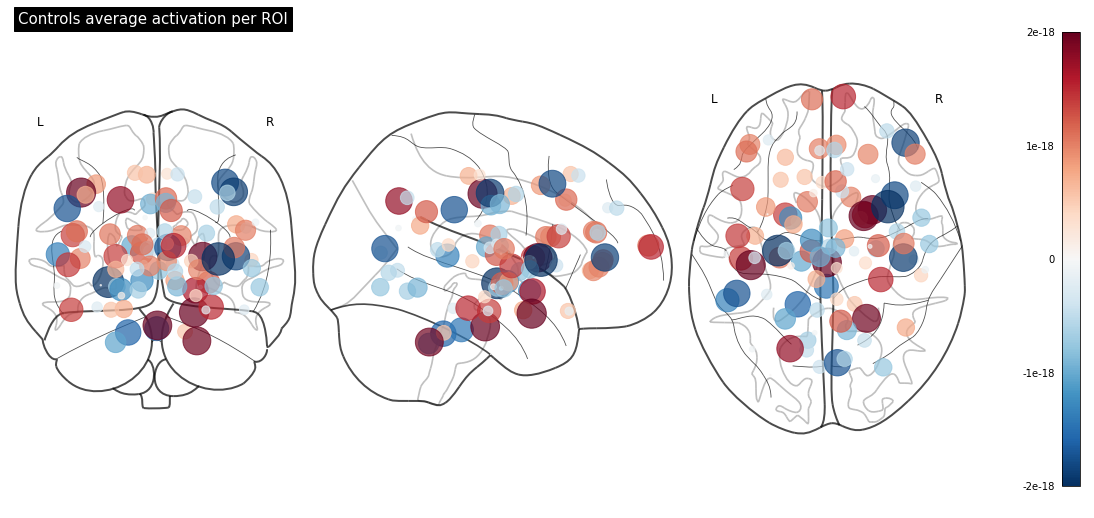

In [41]:
from nilearn import plotting
import numpy as np
import seaborn as sns
import pickle

os.chdir('/home/acamassa/ABCD/DDC/src/abcd_ddc/')
with open('coord_list.pickle', 'rb') as f:
    coord_list = pickle.load(f)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.mean(control,axis=0),
    coord_list,
    node_cmap="RdBu_r",
    figure=fig,
    node_vmin=-2e-18,
    node_vmax=2e-18,
    node_size=abs(np.mean(control,axis=0))*4e20,
    title="Controls average activation per ROI",
)
plt.savefig("/home/acamassa/ABCD/DDC_figures/baseline/Controls_activation_map.svg")

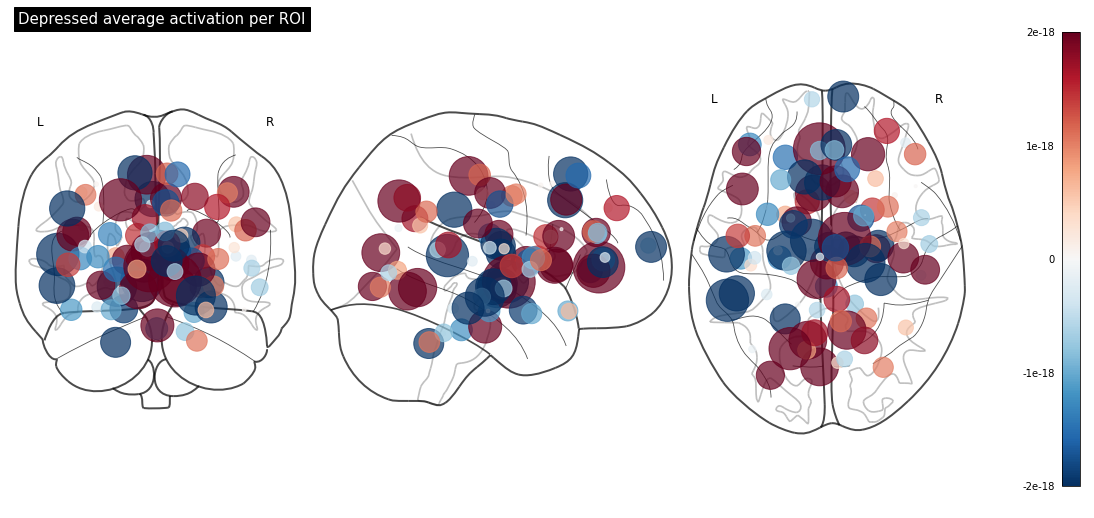

In [42]:

fig=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.mean(depressed,axis=0),
    coord_list,
    node_cmap="RdBu_r",
    figure=fig,
    node_vmin=-2e-18,
    node_vmax=2e-18,
    node_size=abs(np.mean(depressed,axis=0))*4e20,
    title="Depressed average activation per ROI",
)
plt.savefig("/home/acamassa/ABCD/DDC_figures/baseline/Depressed_activation_map.svg")
